<div class="alert alert-block alert-info">  
    
# **LOAN RISK ASSESMENT**

#### ***Predict whether the loan be approved or denied?***
    
Team 1 : **Payrangers**
- Alif Naufal Falih
- Amelia Nisrinah
- Febrianti
- Jennifer Virginia Cahyadi
- Muhammad Fathan Muttaqy
    
</div>

## **CHAPTER I. BUSINESS UNDERSTANDING**

**Dataset Introduction & Problem Statement :**
<div align='justify'>
Dataset <b>SBAnational.csv</b> adalah dataset yang berasal dari <i>U.S. Small Business Administration (SBA)</i>, yang berperan membantu pihak pengusaha kecil di pasar kredit AS melalui program pemberian jaminan yang dirancang agar pihak Bank dapat memberikan pinjaman kepada pengusaha kecil. SBA bertindak seperti penyedia asuransi untuk mengurangi risiko pihak Bank dengan menutupi beberapa kerugian melalui sebagian jaminan yang diberikan jika para pengusaha kecil gagal melunasi pinjaman mereka, sehingga pihak Bank tidak perlu khawatir.
</div>

<div align='justify'>
Namun karena jaminan yang diberikan SBA hanya sebagian dari seluruh saldo pinjaman, Bank akan mengalami kerugian jika pihak pengusaha kecil gagal dalam melunasi pinjaman yang dijamin SBA. Oleh karena itu, Bank masih dihadapkan pada pilihan yang sulit apakah mereka harus memberikan pinjaman tersebut atau tidak karena harus mempertimbangkan risiko gagal bayar yang masih tinggi walaupun sebagian sudah dijamin oleh pihak SBA.
</div>

**Role :**
<div align='justify'>
Disini kami berperan sebagai Tim Data Scientist dari sebuah perusahaan layanan konsultasi <i>Data Analytic and Decisioning (DAD)</i> yang bermitra dengan pihak Bank
</div>

**Goals :**
<div align='justify'>
Adapun <i>goals</i> yang ingin kami capai adalah meminimalisir risiko adanya pengusaha kecil yang tidak mampu melunasi pinjaman.
</div>


**Business Matrics :**
<div align='justify'>
Berikut adalah <i>Business Matrics</i> yang kami gunakan sebagai pengukur keberhasilan dari <i>goals</i> yang ingin kami capai :
<br/>
<i>Default Rate</i> (rasio gagal bayar dari total pinjaman yang diterima), yakni meminimalisir risiko adanya pengusaha kecil yang tidak mampu melunasi pinjaman
</div>


**Objective :**
<div align='justify'>
Berdasarkan latar belakang yang ada kami bermaksud melakukan analisa pada data historis yang tersedia, untuk membuat <i>Machine Laerning Model</i> yang dapat memprediksi secara otomatis penilaian risiko pinjaman, apakah pinjaman yang diajukan oleh pengusaha kecil layak untuk disetujui atau ditolak. Sehingga dengan adanya model ini, akan meminimalisir risiko gagal bayar dari pengajuan pinjaman yang masuk.
</div>


## **CHAPTER II. PREPARATION**

### **2.1. Import Libraries**

In [ ]:
# Basic libraries :
import numpy as np
import pandas as pd
import math
import datetime
import scipy.stats as st
from datetime import date
import warnings
warnings.filterwarnings('ignore')

# Python Data Visualization Libraries :
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

#### Customizing Method

**Matplotlib**

In [ ]:
rcParams['figure.figsize']  = 8, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

**Format Display**

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns',None)

### **2.2. Load Dataset**

#### **2.2.1. Load Dataset**

In [ ]:
df_SBAnational = pd.read_csv('/content/should-this-loan-be-approved-or-denied/SBAnational.csv')

In [ ]:
df = df_SBAnational.copy()
df.sample(3)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
547214,5368014010,VICKY'S KITCHEN & CATERING CO,PERRY,IA,50220,WEST BANK,IA,722110,29-Apr-02,2002,88,6,2.00,0,0,1,1,0,Y,19-Apr-06,31-Jul-02,"$108,000.00",$0.00,CHGOFF,"$80,129.00","$108,000.00","$91,800.00"
730229,7598444004,CATALYST COFFEE COMMUNITY & CR,FORT COLLINS,CO,80525,WELLS FARGO BANK NATL ASSOC,SD,722213,9-Jul-04,2004,141,2,2.00,0,2,1,1,N,N,NaN,30-Sep-04,"$59,000.00",$0.00,P I F,$0.00,"$59,000.00","$50,150.00"
704945,7330014003,SPECTRACORP INC,DENVER,CO,80223,KEYBANK NATIONAL ASSOCIATION,OH,325910,5-Apr-04,2004,108,24,1.00,8,32,1,1,0,N,NaN,31-May-04,"$150,000.00",$0.00,P I F,$0.00,"$150,000.00","$127,500.00"


In [ ]:
#untuk mengetahui dimensi dari dataframe
df.shape 

(899164, 27)

#### **2.2.2 Load Data Dictionary (Description of Variable)**

##### **a. Description of 27 Variables in Both Datasets**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_27_variabels = pd.read_csv('/content/drive/MyDrive/Amelia Nisrinah/Rakamin Academy - Data Science/Sharing Folder - Final Project Klp 1 Batch 24/SOURCE CODE FINAL PROJECT (PIC AMEL)/Source Data/Description of 27 variables in both datasets.csv')
df_27_variabels

,Variable name,Data type,Description of variable
0,LoanNr_ChkDgt,Text,Identifier – Primary key
1,Name,Text,Borrower name
2,City,Text,Borrower city
3,State,Text,Borrower state
4,Zip,Text,Borrower zip code
5,Bank,Text,Bank name
6,BankState,Text,Bank state
7,NAICS,Text,North American industry classification system ...
8,ApprovalDate,Date/Time,Date SBA commitment issued
9,ApprovalFY,Text,Fiscal year of commitment


##### **b. Description of The First Two Digits of NAICS**

In [ ]:
df_2digit_naics = pd.read_csv('/content/drive/MyDrive/Amelia Nisrinah/Rakamin Academy - Data Science/Sharing Folder - Final Project Klp 1 Batch 24/SOURCE CODE FINAL PROJECT (PIC AMEL)/Source Data/Description of the first two digits of NAICS.csv')
df_2digit_naics

,Sector,Description
0,11,"Agriculture, forestry, fishing and hunting"
1,21,"Mining, quarrying, and oil and gas extraction"
2,22,Utilities
3,23,Construction
4,31–33,Manufacturing
5,42,Wholesale trade
6,44–45,Retail trade
7,48–49,Transportation and warehousing
8,51,Information
9,52,Finance and insurance


<div align='justify'>
<b>NAICS <i>(North American Industry Classification System)</i></b> adalah sistem klasifikasi hierarkis 2 hingga 6 digit yang digunakan oleh badan statistik Federal dalam mengklasifikasikan perusahaan bisnis untuk pengumpulan, analisis, dan penyajian data statistik yang menggambarkan ekonomi AS. Dua digit pertama klasifikasi NAICS mewakili sektor ekonomi.
</div>

## **CHAPTER III. EXPLORATORY DATA ANALYSIS (EDA)**

- 3.1. Descriptive Statistics
- 3.2. Univariate Analysis
- 3.3. Multivariate Analysis
- 3.4. Business Insight

### **3.1. Descriptive Statistics**

#### **3.1.1. General Information of DataFrame**

Menampilkan informasi umum mengenai dataframe, terkait jumlah dan nama kolom, *Null Values* dan *Data Types*

##### **a. df.info()**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

##### **b. Check null value**

In [ ]:
df.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [ ]:
# Mengitung total null value
tot_nullvalue = (df.isnull().sum()).sum()
tot_nullvalue

751259

In [ ]:
# Persentase null value keseluruhan data
gtot_null = tot_nullvalue.sum()/len(df)*100
gtot_null

83.55083166140993

In [ ]:
# Mengitung total null value tanpa feature 'ChgOffDate'
gtot_null_nonChgOffDate = tot_nullvalue.sum() - df['ChgOffDate'].isnull().sum()
gtot_null_nonChgOffDate

14794

In [ ]:
# Persentase null value tanpa feature 'ChgOffDate'
gtot_null_nonChgOffDate/len(df)*100

1.6453060843183223

##### **c. Observation result**

**df.info() :**
- Data terdiri dari 899,164 **baris** dan 27 **kolom**
- Setiap baris merepresentasikan satu peminjam
- Terdapat kolom yang **belum sesuai dengan tipe data seharusnya**, yakni : <br>
  * Ada **3** kolom yang seharusnya bertipe data ***datetime*** tetapi **terdeteksi object**, yakni :
    1. ApprovalDate
    2. ChgOffDate
    3. DisbursementDate <br>
  * Ada **6** kolom yang seharusnya **numerik** tetapi **terdeteksi object**, yakni :
    1. DisbursementGross
    2. BalanceGross
    3. ChgOffPrinGr
    4. GrAppv
    5. SBA_Appv
    6. ApprovalFY
  * Kolom NewExist terdeteksi **float** sebaiknya diubah ke dalam bentuk **int**
  * Kolom ' NAICS' sebaiknya dalam bentuk **data kategorik**

**Null Value :**
- Terdapat 11 kolom yang memiliki Null Values:
  - *Name, City, Satate, Bank, BankState, NewExist, RevLineCr, LowDoc, ChgOffDate, DisbursementDate, MIS_Status*
- Kolom yang mempunyai nilai kosong paling banyak adalah kolom ChgOffDate dengan jumlah 736,465 yakni sekitar 82% dari total seluruh baris.
- Persentase null values pada dataset sangat tinggi yaitu 83.6% hal tersebut karena feature 'ChgOffDate' memiliki jumlah null values sangat tinggi sehingga perlu diperiksa lebih lanjut.
- Apabila 'ChgOffDate' didrop maka null valuesnya hanya 1.64% sehingga 1 variabel ChgOffDate ini bisa didrop saja.
- Null values pada kolom 'MIS_Status' sebaiknya didrop karena kolom tersebut merupakan target sehingga tidak boleh ada nilai yang kosong


Berikut adalah tabel perbandingan tipe data dari hasil df.info() dan library dari dataFrame :


#### **3.1.2. Change Data Type**

###### **a. Object to DateTime**

Untuk **3 kolom** yang seharusnya bertipe data *datetime* tetapi terdeteksi object, yakni ***ApprovalDate, ChgOffDate,*** dan **DisbursementDate**, maka dirubah kedalam format *datetime* :

In [ ]:
# Memeriksa value pada features
df[['ApprovalDate','DisbursementDate','ChgOffDate']].sample(2)

,ApprovalDate,DisbursementDate,ChgOffDate
575040,6-Sep-02,16-Jul-03,NaN
567161,6-Aug-02,31-Jan-03,NaN


In [ ]:
# Mengubah tipe data menjadi datetime
to_datetime = ['ApprovalDate','DisbursementDate','ChgOffDate']
df[to_datetime] = df[to_datetime].apply(pd.to_datetime)

###### **b. Object to Numeric**

Untuk **6 kolom** yang seharusnya numerik tetapi terdeteksi object, yakni **DisbursementGross, BalanceGross, ChgOffPrinGr, GrAppv, SBA_Appv, dan ApprovalFY** :

In [ ]:
# Memeriksa value pada features
df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].sample(3)

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
694016,"$100,000.00",$0.00,"$43,577.00","$50,000.00","$25,000.00"
574624,"$313,000.00",$0.00,$0.00,"$313,000.00","$250,400.00"
691968,"$10,000.00",$0.00,$0.00,"$10,000.00","$5,000.00"


**Observation Results**:
- Features dibaca sebagai tipe data str karena memiliki tanda '$' dan ','.
- Perlu dilakukan cleansing data sebelum diubah menjadi tipe data float.

In [ ]:
# Cleansing data
currency = ['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']
df[currency] = df[currency].applymap(lambda x: x.strip().replace('$','').replace(',',''))

# Merubah tipe data menjadi numeric (float)
df[currency] = df[currency].astype(float)

In [ ]:
# Memeriksa values pada 'ApprovalFY'
df['ApprovalFY'].unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1962, 1982, 1965, 1966, 1983, 1973, 1984, 2007,
       1985, 1986, 1987, 2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010,
       1967, 2011, 1992, 1993, 2002, 2012, 2013, 1994, 2014, 1975, 1977,
       1976, 1968, '2004', '1994', '1979', '1976', '1967', '1975', '1974',
       '1977', '1981', '1982', '1983', '1984', '1978', '1980', '1968',
       '1976A', '1969', '1995', '1970', '2005', '1996', '1971', 1996,
       1971], dtype=object)

**Observation Result:**
Terdapat dua tipe data pada feature 'ApprovalFY' yaitu int dan str, dimana ada huruf A pada tipe data str pada tahun 1976.

In [ ]:
# Membuat fungsi untuk membersihkan value string
def clean_str(x):
    if isinstance(x, str):
        return x.replace('A', '')
    return x
    
# Cleansing data dan merubah tipe data ApprovalFY menjadi numeric (int)
df['ApprovalFY'] = df['ApprovalFY'].apply(clean_str).astype('int')
df['ApprovalFY'].unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1962, 1982, 1965, 1966, 1983, 1973, 1984, 2007,
       1985, 1986, 1987, 2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010,
       1967, 2011, 1992, 1993, 2002, 2012, 2013, 1994, 2014, 1975, 1977,
       1976, 1968, 1969, 1995, 1970, 1996, 1971])

###### **c. Float to Int**

In [ ]:
# Memeriksa values NewExist
df['NewExist'].unique()

array([ 2.,  1.,  0., nan])

In [ ]:
# Karena nilai null pada NewExist hanya sedikit (136) maka akan didrop agar tipe datanya dapat diubah ke int
df.dropna(subset=['NewExist'],inplace=True)

# Merubah tipe data menjadi int
df['NewExist'] = df['NewExist'].astype(int)

# Memeriksa values NewExist setelah diubah tipe datanya
df['NewExist'].unique()

array([2, 1, 0])

###### **d. Numeric to Object**

In [ ]:
# Merubah tipe data menjadi str
df['NAICS'] = df['NAICS'].astype(str)

##### **e. Recheck Data Type**

Lihat kembali tipe data dari setiap kolom :

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899028 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNr_ChkDgt      899028 non-null  int64         
 1   Name               899014 non-null  object        
 2   City               898998 non-null  object        
 3   State              899014 non-null  object        
 4   Zip                899028 non-null  int64         
 5   Bank               897469 non-null  object        
 6   BankState          897462 non-null  object        
 7   NAICS              899028 non-null  object        
 8   ApprovalDate       899028 non-null  datetime64[ns]
 9   ApprovalFY         899028 non-null  int64         
 10  Term               899028 non-null  int64         
 11  NoEmp              899028 non-null  int64         
 12  NewExist           899028 non-null  int64         
 13  CreateJob          899028 non-null  int64   

**Observation Result:** Dapat dilihat dari df.info() untuk kolom-kolom yang sudah dilakukan reformating tipe data, sudah sesuai dengan tipe data yang seharusnya.

#### **3.1.3. Statistical Summary**

In [ ]:
# Untuk kebutuhan analisis statistik kami akan membuat tipe data kolom sesuai dengan tipe datanya

df_stat = df.astype({'LoanNr_ChkDgt': 'str', 
               'Zip': 'str', 
               'NewExist': 'str', 
               'NAICS': 'str', 
               'FranchiseCode': 'str', 
               'UrbanRural': 'str',
               'ApprovalFY': 'str'
            })

In [ ]:
#Kolom dengan tipe data Numerik (total 9 kolom)
numeric = ['Term','NoEmp','CreateJob','RetainedJob','DisbursementGross',
            'BalanceGross','ChgOffPrinGr','GrAppv','SBA_Appv']

#Kolom dengan tipe data Ketegorik (total 14 kolom)
categoric = ['LoanNr_ChkDgt','Name','City','State','Zip','Bank','BankState',
              'NAICS','NewExist','FranchiseCode','UrbanRural', 'RevLineCr','LowDoc','MIS_Status']

#Kolom dengan tipe data datetime (total 4 kolom)
datetime = ['ApprovalDate','ApprovalFY','ChgOffDate','DisbursementDate']

##### **a. Descriptive Statistics - Time**

In [ ]:
df_stat[datetime].describe(include=['datetime','object'])

,ApprovalDate,ApprovalFY,ChgOffDate,DisbursementDate
count,899028,899028,162685,896660
unique,9859,51,6448,8472
top,1993-07-07 00:00:00,2005,2010-03-13 00:00:00,1995-07-31 00:00:00
freq,1131,77525,734,10371
first,1972-02-01 00:00:00,NaN,1988-10-03 00:00:00,1972-02-01 00:00:00
last,2071-12-20 00:00:00,NaN,2026-10-22 00:00:00,2071-12-31 00:00:00


**Observation Result:**
1. 75% data pada feature **ChgOffDate** berisi null value, feature ini menunjukkan tanggal ketika peminjaman dinyatan gagal maka ketika peminjam berhasil dibayar kolom tersebut nilainya null. Feature ChgOffDate lebih baik didrop nantinya, karena kita bisa berfokus dengan kolom MIS_Status status saja.
2. **ApprovalDate** dan **ApprovalFY** merujuk pada waktu pinjaman disetujui, kedua features ini tidak dapat menjadi preditor target sehingga sepertinya akan didrop. Selain itu pada feature ApprovalDate terdapat anomali waktu terakhir yang menunjukkan tahun 2071.
3. **DisbursementDate** menunjukkan tanggal pinjaman dicairkan. Terdapat anomali pada data waktu awal dan akhir. Menurut dokumentasi data yang ada pada dataset hanya diambil dari tahun 1987-2014, kemungkinan ada salah input pada datanya sehingga perlu diperiksa sebaran datanya.

##### **b. Descriptive Statistics - Numeric**

In [ ]:
df_stat[numeric].describe()

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
count,899028.00,899028.00,899028.00,899028.00,899028.00,899028.00,899028.00,899028.00,899028.00
mean,110.78,11.41,8.43,10.80,201142.05,2.99,13504.54,192676.07,149480.28
std,78.86,74.11,236.71,237.14,287552.13,1442.27,65156.27,283172.84,228323.66
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,200.00,100.00
25%,60.00,2.00,0.00,0.00,42000.00,0.00,0.00,35000.00,21250.00
50%,84.00,4.00,0.00,1.00,100000.00,0.00,0.00,90000.00,61285.00
75%,120.00,10.00,1.00,4.00,238000.00,0.00,0.00,225000.00,175000.00
max,569.00,9999.00,8800.00,9500.00,11446325.00,996262.00,3512596.00,5472000.00,5472000.00


**Observation Result :**
- Dilihat dari jarak nilai median dan rata-rata pada keseluruhan variabel dapat disimpulkan bahwa datanya skewed.
- Dari nilai Max/Min keseluruhan variabel, dapat disimpulkan hampir seluruh variabel memiliki outliers.

- **Term** (jangka waktu pinjaman dalam bulan)
  - Kolom Term adalah jangka waktu pinjaman dalam bulan, jika dilihat dari nilai minimunnya adalah 0 sedangkan untuk jangka waktu pinjaman seharusnya tidak ada yang dibawah 1 bulan.
  - 75% data memiliki term (jangka waktu pinjaman) di atas 5 tahun, hal ini sesuai dengan dokumentasi bahwa pinjaman sering dalam waktu 5 tahun atau lebih. Pada bagian Descriptive Statistics - Time yakni fitur DisbursmentDate, telah diketahui bahwa data yang tersedia pada dataset seharusnya dari tahun 1987 s.d 2014, sehingga untuk pinjaman yang dicairkan di atas 2009 tahun lunasnya rata-rata berada di atas tahun 2014. Apabila kami mengambil data 2010 s.d 2014, maka akan memberatkan status CHGOFF, karena pada dokumentasi disebutkan bahwa dataset ini merupakan data yang sudah pasti statusnya. Dari sini dapat diasumsikan bahwa data CHGOFF pinjaman yang dicairkan pada tahun 2010-2014 sudah dapat dideteksi statusnya sedangkan data yang belum memiliki status tidak dimasukan pada dataset ini. Berlatarbelakang hal tersebut kami memutuskan untuk memotong data pinjaman yang dicairkan pada tahun 2010-2014. 
  - Pada dokumen dataset disebutkan terdapat pinjaman yang didukung oleh Real Estate (dijadikan agunan) yg dapat dijadikan indikator resiko pemberian pinjaman. Alasan untuk indikator ini adalah bahwa nilai Real Estate cukup besar untuk menutupi jumlah pinjaman, sehingga mengurangi kemungkinan gagal bayar. Pada dokumen dataset pinjaman yang didukung oleh real estate akan memiliki jangka waktu 20 tahun atau lebih (≥240 bulan). Untuk itu feature term dapat digunakan untuk membuat variabel dummy yg menunjukkan apakah pinjaman didukung oleh real estate atau tidak. 

- **NoEmp** (Jumlah karyawan yang dimiliki) <br>
Pada variable NoEmp nilai minimunya adalah 0, sedangkan NoEmp adalah jumlah karyawan bisnis yang dimiliki, dan tidak mungkin jika sebuah perusahaan tidak memiliki karyawan sama sekali. Kemungkinan ada kesalahan dalam input datanya.

- **RetainedJob**
 - Feature ini memiliki 25% data bernilai 0.
 - Dari feature ini lebih baik dibuat feature baru yg menunjukkan apakah bisnis memiliki karyawan tetap atau tidak.

-  **BalanceGross dan ChgOffPrinGr** <br>
75% data memiliki nilai 0 sehingga dua features ini akan didrop saja. Selain itu ChgOffPrinGr merupakan feature yang berisi jumlah yang dibebankan apabila pinjaman charge off, hal ini tidak dapat dijadikan penentu target.

- **SBA_Appv** <br>
SBA_Appv menunjukkan jumlah jaminan yang diberikan oleh SBA kepada bank. Sebaiknya value dari feature ini dibuat dalam bentuk persentase.

- **DisbursementGross** <br>
Terdapat anomali pada nilai minimum yaitu 0, dimana hal ini tidak mungkin.







##### **b. Descriptive Statistics - Categoric**

In [ ]:
df_stat[categoric].describe()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status
count,899028,899014,898998,899014,899028,897469,897462,899028,899028,899028,899028,894500,896449,897033
unique,899028,779475,32581,51,33611,5802,56,1312,3,2768,3,18,8,2
top,1000014003,SUBWAY,LOS ANGELES,CA,10001,BANK OF AMERICA NATL ASSOC,CA,0,1,1,1,N,N,P I F
freq,1,1269,11558,130608,933,86852,118112,201948,644869,638554,470547,420194,782690,739489


**Observation Result :**

- **LoanNr_ChkDgt, Name, Bank**, mempunyai kardinalitas yang tinggi, dan tidak berpengaruh terhadap target sehingga akan didrop.

- **City** dan **Zip** mempunyai kardinalitas yang tinggi dan dapat diwakilkan oleh feature State sehingga kedua features ini akan didrop.

- **State** dan **BankState** memiliki unique value yang cukup banyak, akan lebih mudah apabila dilakukan feature engineering dengan membuat feature baru yg menunjukkan state peminjam apakah sama dengan state bank untuk dilihat pengaruhnya terhadap target. Selain itu perlu dilihat berapa default rate pada masing-masing State.

- Pada dokumentasi dataset disebutkan bahwa dua digit pertama pada kode **NAICS** menunjukkan industri dari bisnis yg dijalankan oleh peminjam. Berdasarkan hal ini akan dibuat kolom baru untuk mengklasifikasikan NAICS berdasarkan nama sektor industrinya.

- **NewExist** terdeteksi memiliki 3 *unique value*, sedangkan seharusnya hanya ada 2 *unique value* yakni, 
1 = *Existing business*,
2 = *New business*

- Feature **FranchiseCode** menunjukkan kode franchise dimana nilai 00000 atau 00001 menunjukkan bisnis bukan franchise, akan lebih mudah apabila kolom ini dibuat *boolean value* mengingat kardinalitasnya yang juga tinggi.

- **RevLineCr** terdeteksi memiliki 18 unique values, sedangkan seharusnya hanya ada 2 unique value yakni, 
Revolving line of credit: 
Y = Yes, N = No
kemungkinan ada kesalahan input.

- **LowDoc** terdeteksi memiliki 8 unique values, sedangkan seharusnya hanya ada 2 unique value yakni, 
LowDoc Loan Program: Y = Yes, N = No
kemungkinan ada kesalahan input. Berdasarkan dokumentasi dataset feature ini menunjukkan jumlah dokumen yang diperlukan berdasarkan besaran pinjaman dimana ketika nilai pinjaman < 150.000 dokumen yg diperlukan sedikit (LowDoc='Y') sementara ketika pinjaman >= 150.000 dokumen yg diperlukan lebih banyak (LowDoc='N'). Kemungkinan feature ini tidak akan digunakan karena hanya kategori berdasarkan besar pinjaman, kami lebih memilih menggunakan feature yang menunjukkan besar pinjamannya langsung.

- **MIS_Status** <br>
 - Terdiri dari 2 unique values yaitu:
   * P I F = Paid in full, yakni pinjaman yang dibayar lunas
   * CHGOFF = Loan status charged off, yakni pinjaman yang gagal dibayarkan
 - Total value sebanyak 897033 dengan value didominasi oleh P I F sebanyak 739489. Dari sini dapat disimpulkan bahwa target imbalace sehingga perlu dilakukan over sampling atau under sampling saat pre-processing nantinya.




###### **Value Counting**

Mereview lebih detil jumlah value pada masing-masing feature.

In [ ]:
for column in categoric:
    print(f'''Value count kolom {column}:''')
    print(df_stat[column].value_counts())
    print()

Value count kolom LoanNr_ChkDgt:
1000014003    1
5945503009    1
5945354008    1
5945364000    1
5945373007    1
             ..
3072554010    1
3072555006    1
3072556002    1
3072564002    1
9996003010    1
Name: LoanNr_ChkDgt, Length: 899028, dtype: int64

Value count kolom Name:
SUBWAY                            1269
QUIZNO'S SUBS                      433
COLD STONE CREAMERY                366
QUIZNO'S                           345
DOMINO'S PIZZA                     329
                                  ... 
OFFICE FURNITURE MART OF INDPL       1
Gerard J. Tremblay, Jr dba Ame       1
ACTIVE LIFE CHIROPRACTIC PC          1
VARIANCE SERVICES INC                1
PACIFIC TRADEWINDS FAN & LIGHT       1
Name: Name, Length: 779475, dtype: int64

Value count kolom City:
LOS ANGELES                       11558
HOUSTON                           10246
NEW YORK                           7846
CHICAGO                            6033
MIAMI                              5592
                     

### **3.2. Univariate Analysis**

#### **3.2.1. Univariate Analysis - Date Time**

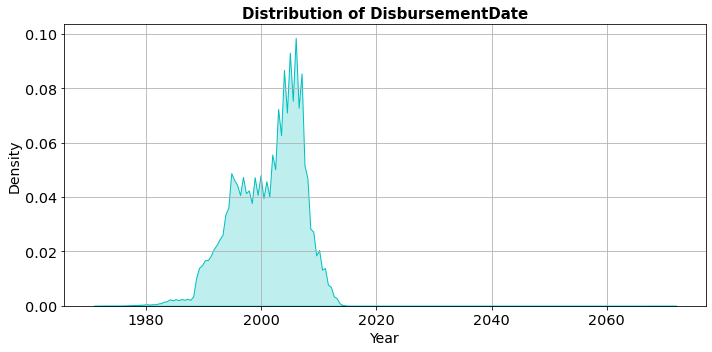

In [ ]:
# Melihat distribusi data DisbursementDate secara keseluruhan yang ada di dataset
plt.figure(figsize=(10,5))
sns.kdeplot(df_stat['DisbursementDate'].dt.year, color= 'c', shade=True)

plt.title('Distribution of DisbursementDate', fontsize=15, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.grid()
plt.tight_layout()

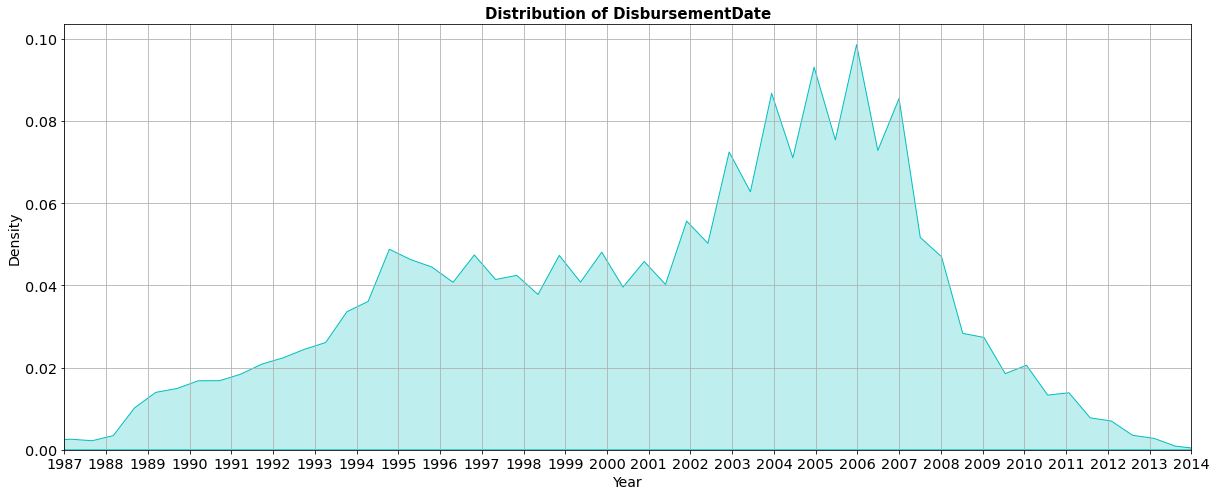

In [ ]:
# Melihat distribusi data sesuai dengan yang disebutkan pada dokumentasi yakni dari tahun 1987-2014
plt.figure(figsize=(17,7))
sns.kdeplot(df_stat['DisbursementDate'].dt.year, color= 'c',shade=True)
plt.xlim(1987,2014)
plt.xticks([i for i in range(1987,2015)])

plt.title('Distribution of DisbursementDate', fontsize=15, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.grid()
plt.tight_layout()

**Observation Result:** 
Terlihat pada grafik yang pertama (sebelum difilter tahunnya) terdapat banyak nilai error yang menyebabkan distribusi datanya positively skewed. Jumlah pinjaman dari tahun ke tahun menunjukkan tren yang meningkat kecuali pada tahun 2007-2009 pinjaman menurun yang diakibatkan oleh resesi, karena hal ini merupakan pengecualian maka kami akan memotong data pinjaman pada tahun 2007-2009. Selain itu sesuai hasil observasi feature Term pada Descriptive Statistics Numeric kami akan memotong data pinjaman tahun 2010-2014 sehingga **untuk analisis-analisis selanjutnya kami hanya akan melakukan analisa pada data untuk data tahun tahun 1987 s.d 2006.**

Source : 

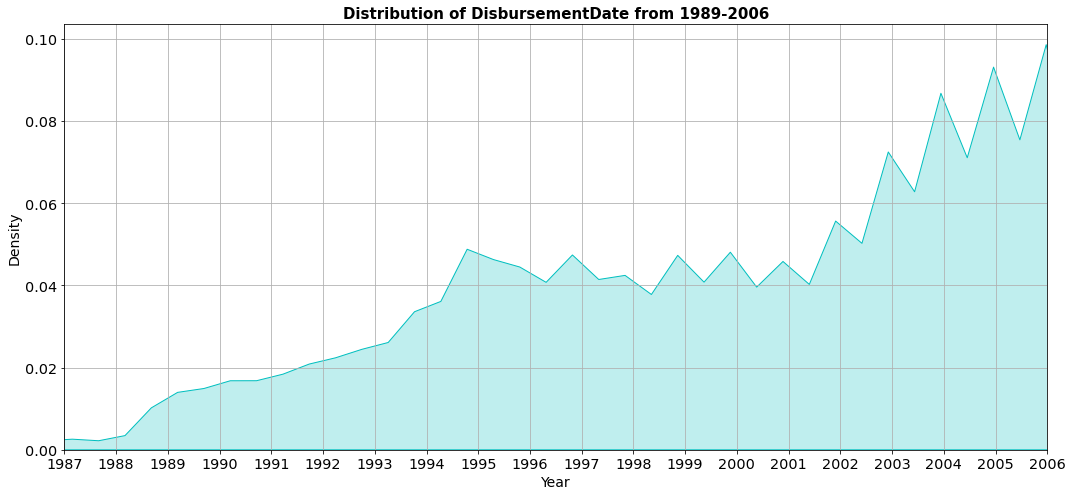

In [ ]:
# Melihat distribusi data dari tahun 1987-2006
plt.figure(figsize=(15,7))
sns.kdeplot(df_stat['DisbursementDate'].dt.year, color= 'c',shade=True)
plt.xlim(1987,2006)
plt.xticks([i for i in range(1987,2007)])

plt.title('Distribution of DisbursementDate from 1989-2006', fontsize=15, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.grid()
plt.tight_layout()

In [ ]:
df['MIS_Status'].value_counts()

P I F     739489
CHGOFF    157544
Name: MIS_Status, dtype: int64

#### **3.2.2. Univariate Analysis - Numeric**

In [ ]:
# analisa hanya dilakukan pada data dari tahun 1987 s.d 2006
df = df[(df['DisbursementDate'].dt.year>=1987)&((df['DisbursementDate'].dt.year<=2006))]

In [ ]:
# Untuk kebutuhan analisis statistik df_stat diperbaharui

df_stat = df.astype({'LoanNr_ChkDgt': 'str', 
               'Zip': 'str', 
               'NewExist': 'str', 
               'NAICS': 'str', 
               'FranchiseCode': 'str', 
               'UrbanRural': 'str',
               'ApprovalFY': 'str'
            })

In [ ]:
# Memilih features yang diperkirakan berpengaruh terhadap target berdasarkan Statistical Summary
# untuk dilakukan Univariate dan Multivariate analysis

#Kolom dengan tipe data Numerik (total 7 kolom)
numeric_viz = ['Term','NoEmp','CreateJob','RetainedJob','DisbursementGross',
               'GrAppv','SBA_Appv']

#Kolom dengan tipe data Ketegorik (total 5 kolom)
categoric_viz = ['NewExist','UrbanRural','RevLineCr','MIS_Status','LowDoc']

#Kolom dengan tipe data datetime
datetime_viz = ['DisbursementDate']

##### **a. Individual Boxplots**

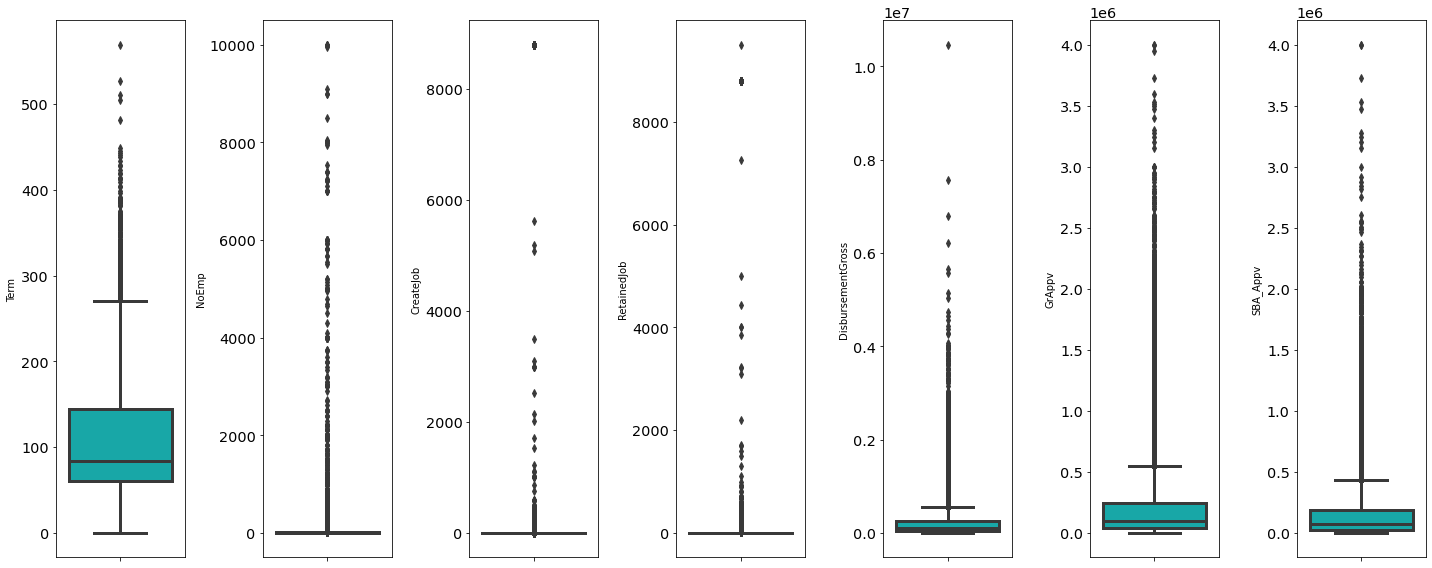

In [ ]:
features = numeric_viz
plt.figure(figsize=(20,8))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='c', orient='v')
    plt.tight_layout()

**Observation Result :**

Terlihat outlier dengan distribusi positively skewed pada seluruh features numeric sehingga perlu dilakukan handling outlier.

##### **b. Individual Displot**

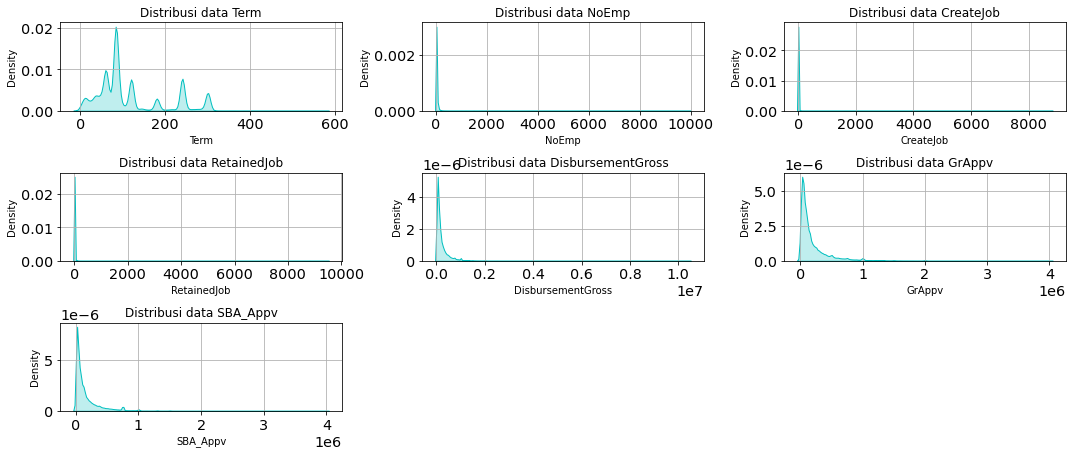

In [ ]:
features = numeric_viz
plt.figure(figsize=(15,8))
for i in range(0, len(features)):
    plt.subplot(4, 3, i+1)
    sns.kdeplot(x=df_stat[features[i]], color='c',shade=True)
    plt.xlabel(features[i])
    plt.grid()
    plt.title(f'Distribusi data {features[i]}')
    plt.tight_layout()
    

**Observation Result :**
Rata-rata seluruh feature terlihat positively skewed sehinga dibutuhkan log tranformation untuk data yg berpengaruh terhadap target.


#### **3.2.3. Univariate Analysis - Categoric**

##### **a. Individual Countplot**  

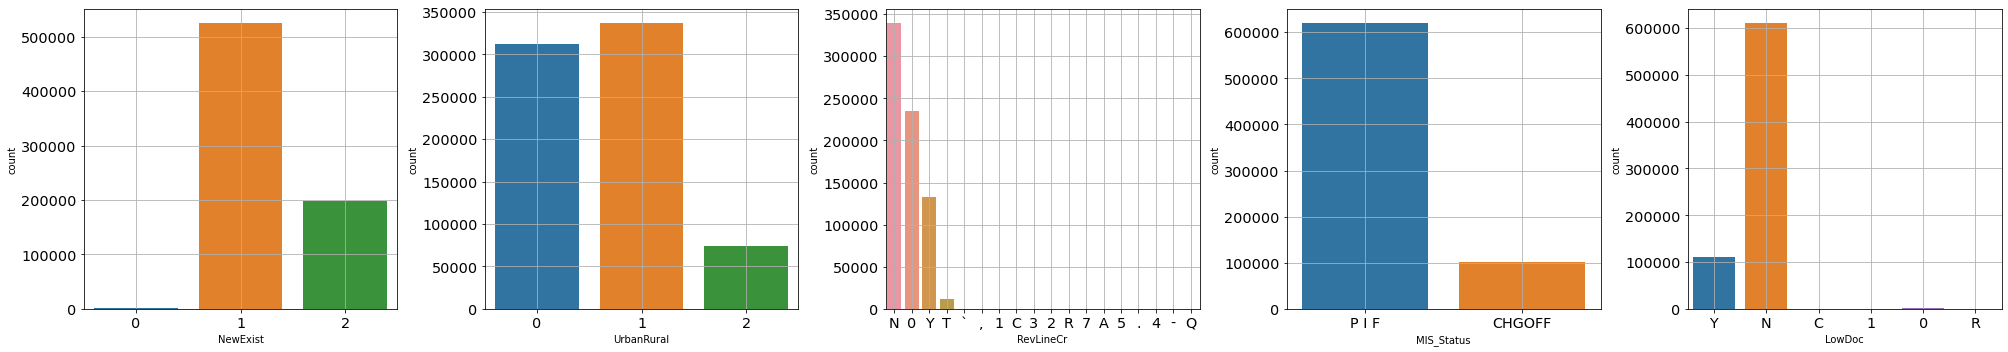

In [ ]:
plt.figure(figsize=(28,5))
features = categoric_viz

for i in range(0,len(features)):
    #sns.set_style('darkgrid')
    plt.subplot(1,5,i+1)
    sns.countplot(x=df[features[i]])
    plt.grid()
    plt.tight_layout()

**Observation Result:**
1. Dapat dilihat bahwa NewExist, RevLineCr dan LowDoc memiliki nilai error.
2. NewExist cukup imbalance.
3. MIS_Status (target) imbalance.
4. LowDoc imbalance, feature ini akan didrop karena tidak dapat menjadi prediktor yang baik.

### **3.3. Multivariate Analysis**

#### **3.3.1 Multivariate Analysis - Date Time**

##### **a. kdeplot**

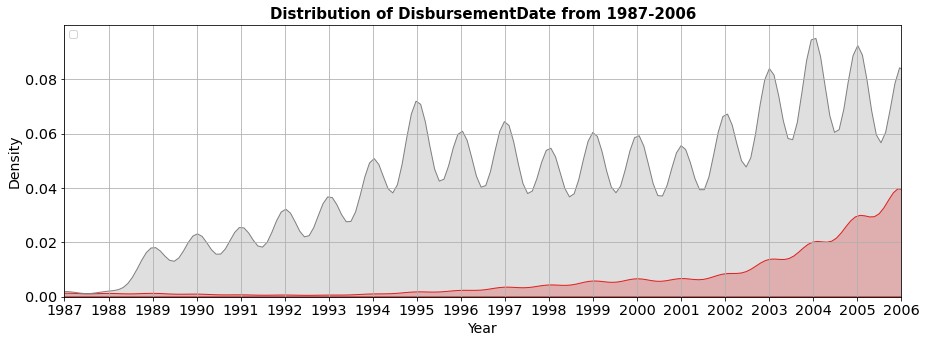

In [ ]:
plt.figure(figsize=(15,5))
sns.kdeplot(df_stat['DisbursementDate'].dt.year,  palette=['Grey','Red'], hue=df_stat['MIS_Status'],shade=True)
plt.grid()
plt.xlim(1987,2006)
plt.xticks([i for i in range(1987,2007)])

plt.title('Distribution of DisbursementDate from 1987-2006', fontsize=15, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(loc='upper left');

In [ ]:
dr = df.groupby([df['DisbursementDate'].dt.year,'MIS_Status']).MIS_Status.count().reset_index(name='TotalMIS_Status')
dr['DefRateYear'] = dr['TotalMIS_Status']/dr.groupby('DisbursementDate')['TotalMIS_Status'].transform('sum')
dr = dr[dr['MIS_Status']=='CHGOFF']
dr

,DisbursementDate,MIS_Status,TotalMIS_Status,DefRateYear
0,1987,CHGOFF,913,0.42
2,1988,CHGOFF,823,0.40
4,1989,CHGOFF,861,0.07
6,1990,CHGOFF,661,0.05
8,1991,CHGOFF,475,0.03
10,1992,CHGOFF,438,0.02
12,1993,CHGOFF,409,0.02
14,1994,CHGOFF,696,0.02
16,1995,CHGOFF,1220,0.03
18,1996,CHGOFF,1562,0.04


**Observation Result:**
Jumlah charge off sangat tinggi pada tahun 1987-1988 karena terjadi krisis ekonomi (black monday) kemudian membaik hingga 1994 lalu meningkat terus hingga 2006.

#### **3.3.2. Multivariate Analysis - Numeric**

##### **a. Correlation Heatmap**

Text(0.5, 1.0, 'Correlation Heatmap Between Numerical Variables')

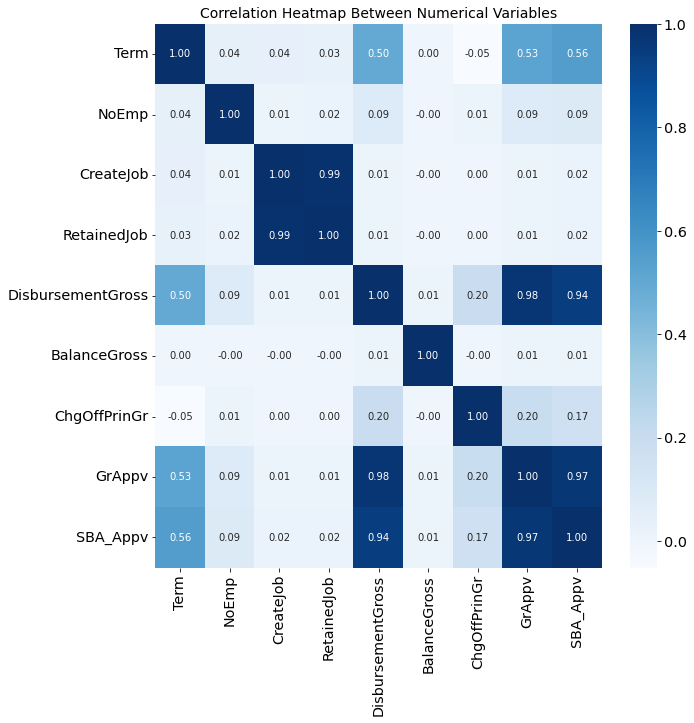

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df_stat.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.title('Correlation Heatmap Between Numerical Variables', fontsize=14)

**Observation Results:**

- **Term** memiliki korelasi yang positif dengan **DisbursementGross, Gross Approved**, dan **SBA_Appv**. Hal tersebut mengindikasikan jangka waktu pinjaman yang lebih lama berpotensi memiliki nilai pinjaman yang lebih besar.
- **DisbursementGross, GrAppv,** dan **SBA_Appv** memiliki korelasi yang kuat satu sama lain. Karena ketiganya redundant maka perlu dipilih salah satu saja apabila akan dijadikan feature.
- **DisbursementGross, GrAppv,** dan **SBA_Appv** memiliki korelasi dengan **ChgoffPrinGr**. Hal tersebut masuk akal karena semakin besar nilai pinjaman yang diberikan, maka apabila terjadi Chgoff atau gagal bayar nilainya Chgoff yang diwakili ChgoffPrinGr akan lebih besar.
- **CreateJob** dan **RetainedJob** sama-sama memiliki korelasi 0.99 bersifat redundant sehingga hanya dipilih salah satu saja apabila akan dijadikan feature.
- **DisbursementGross** berkolerasi positif dengan **NoEmp** hal ini menunjukkan bahwa semakin banyak jumlah karyawan (indikasi perusahaan yang lebih besar) maka semakin besar jumlah pinjaman yang cair.


##### **b. Pair Plot**

In [ ]:
# Menentukan jumlah sample dengan rumus slovin
N = df_stat.shape[0]
e = 0.05
slovin = N / (1+ N * e**2)
slovin

399.7786606757489

<Figure size 1080x1080 with 0 Axes>

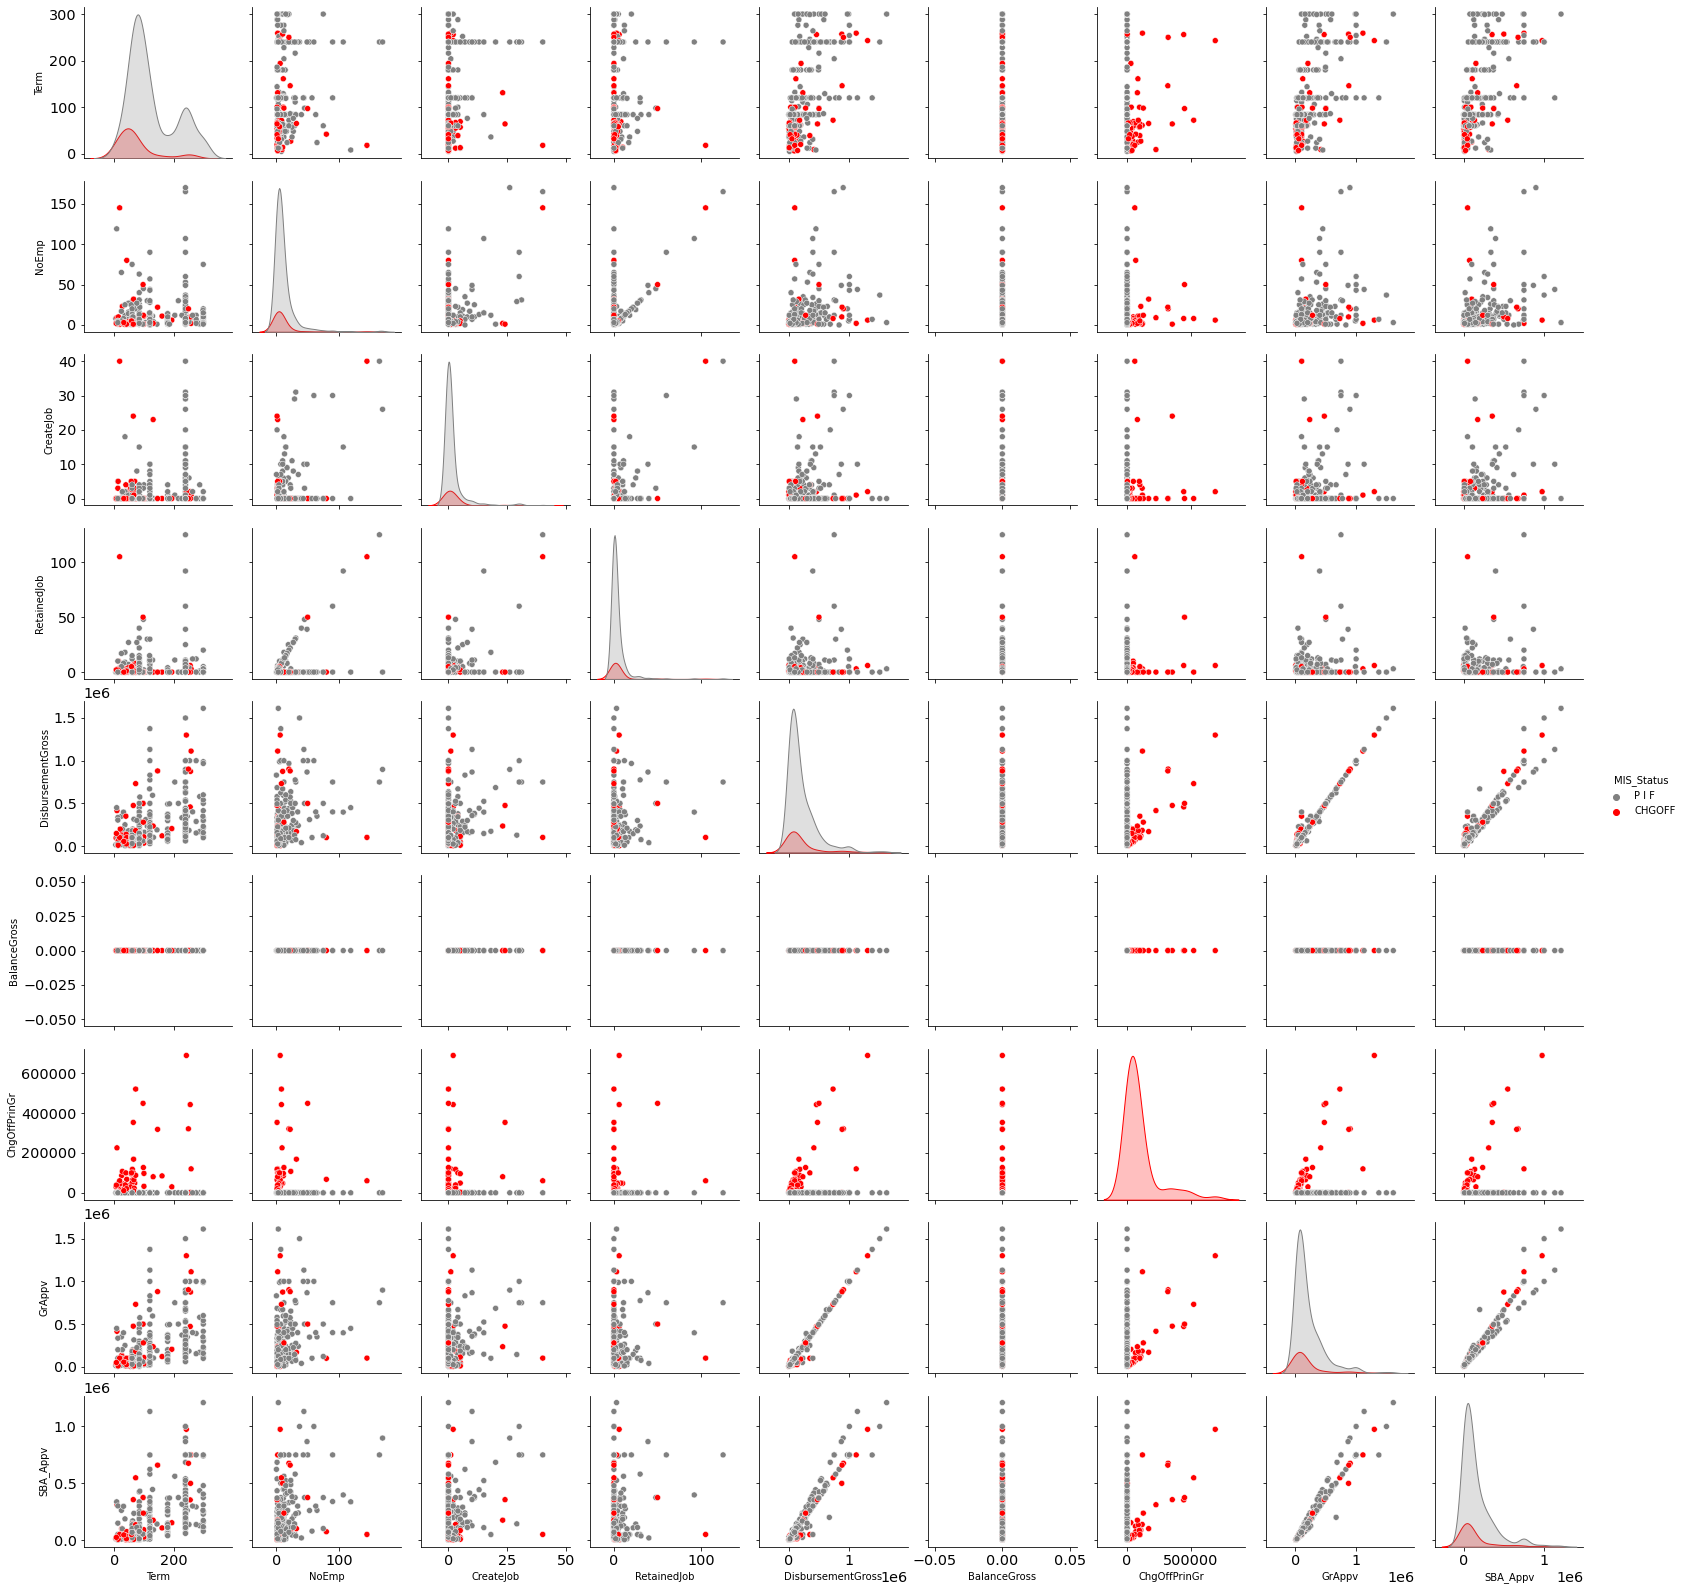

In [ ]:
# Membuat pair plot menggunakan data sample
df_sample = df_stat.sample(n=400, random_state=1)
plt.figure(figsize=(15, 15))
sns.pairplot(df_sample, diag_kind='kde',palette=['Grey','Red'], hue='MIS_Status')

**Observation Results:**

- **SBA Approved**, **Disbursement Gross** dan **Gross Approved** memiliki korelasi linier positif satu sama lain.
- Nilai pencairan pinjaman yang rendah (**Disbursement Gross**) terpusat pada jangka waktu pinjaman yang singkat.
- Feature **Term** dapat menjadi indikator yang baik terhadap taget dilihat dari kdeplotnya puncak distribusi dari P I F dan CHGOFF cukup terpisah. Dengan jangka waktu pinjaman yang lebih lama pinjaman yang berhasil bayar lebih banyak dibandingkan dengan yang gagal bayar. 
- NoEmp tidak dapat memisahkan P I F dan CHGOFF dengan baik, sepertinya feature ini akan didrop.

##### **c. Annova**

**Hipotesis** <br>
H0 = Feature tidak mampu membedakan MIS_Status <br>
H1 = Feature mampu membedakan MIS_Status






In [ ]:
default = df_stat[df_stat['MIS_Status']=='CHGOFF']
paid = df_stat[df_stat['MIS_Status']=='P I F']

for i in range(0,len(numeric_viz)):
  anova = st.f_oneway(default[numeric_viz[i]],paid[numeric_viz[i]])
  pvalue = anova.pvalue
  print(f'Pvalue {numeric_viz[i]}: {pvalue}')
  if pvalue >= 0.05:
    print(numeric_viz[i], 'tidak mampu membedakan PIF dan CHGOFF')
  else:
    print(numeric_viz[i], 'mampu membedakan PIF dan CHGOFF')
    print()


Pvalue Term: 0.0
Term mampu membedakan PIF dan CHGOFF

Pvalue NoEmp: 1.7492069246022588e-75
NoEmp mampu membedakan PIF dan CHGOFF

Pvalue CreateJob: 5.2769221676726685e-06
CreateJob mampu membedakan PIF dan CHGOFF

Pvalue RetainedJob: 0.0005412553256729374
RetainedJob mampu membedakan PIF dan CHGOFF

Pvalue DisbursementGross: 0.0
DisbursementGross mampu membedakan PIF dan CHGOFF

Pvalue GrAppv: 0.0
GrAppv mampu membedakan PIF dan CHGOFF

Pvalue SBA_Appv: 0.0
SBA_Appv mampu membedakan PIF dan CHGOFF



#### **3.3.3. Multivariate Analysis - Categoric**

##### **a. Countplot**

Melihat distribusi data NewExist, UrbanRural, RevLineCr, LowDoc :

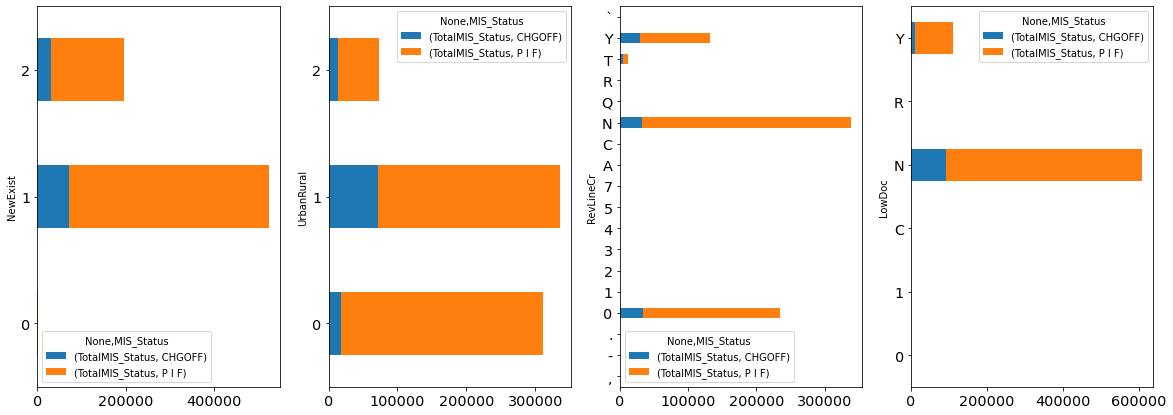

In [ ]:
categoric_countplt = ['NewExist','UrbanRural', 'RevLineCr','LowDoc']

fig, axes = plt.subplots(1,4,figsize=(20, 7))
for i in range(0,len(categoric_countplt)):
  pct = df_stat.groupby([categoric_countplt[i],'MIS_Status']).MIS_Status.count().reset_index(name='TotalMIS_Status')
  #pct['Percentage'] = 100 * pct['TotalMIS_Status']/pct.groupby(categoric_countplt[i])['TotalMIS_Status'].transform('sum')
  
  # style.available
  df_bar = pct.pivot_table(index=categoric_countplt[i], columns='MIS_Status')
  df_bar.plot(ax=axes[i], kind = 'barh', stacked=True)

Melihat visualisasi NewExist, UrbanRural, RevLineCr, LowDoc dalam Persentase CHGOFF dan P I F:

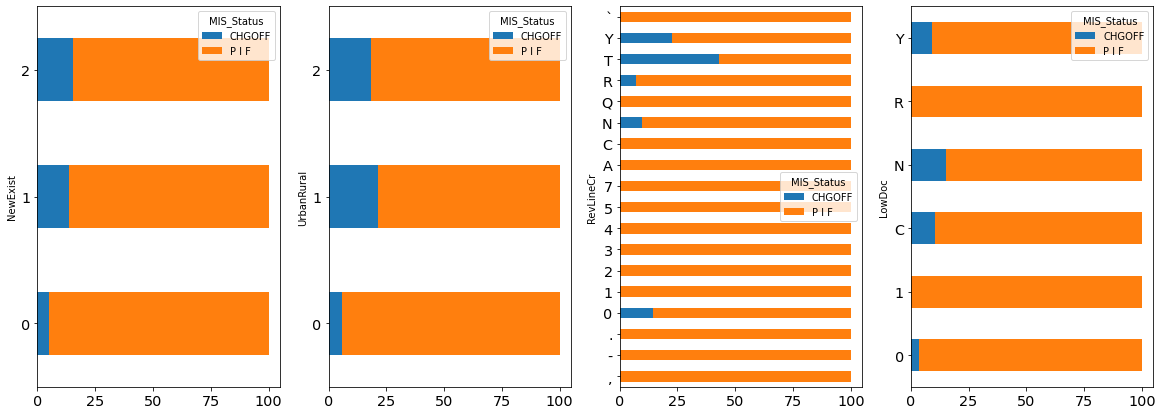

In [ ]:
categoric_countplt = ['NewExist','UrbanRural', 'RevLineCr','LowDoc']

fig, axes = plt.subplots(1,4,figsize=(20, 7))
for i in range(0,len(categoric_countplt)):
  pct = df_stat.groupby([categoric_countplt[i],'MIS_Status']).MIS_Status.count().reset_index(name='TotalMIS_Status')
  pct['Percentage'] = 100 * pct['TotalMIS_Status']/pct.groupby(categoric_countplt[i])['TotalMIS_Status'].transform('sum')
  
  # style.available
  df_bar = pct.pivot_table(index=categoric_countplt[i], columns='MIS_Status',
                           values='Percentage')
  df_bar.plot(ax=axes[i], kind = 'barh', stacked=True)

**Observation Result :**
- **NewExist** : 1 menunjukan bisnis lama dan 2 menunjukan bisnis baru, dapat dilihat bahwa jumlah presentase CHFOFF dan PIF pada kedua kelompok tidak berbeda jauh. 
- **UrbanRural** : presentase CHGOFF pada kelompok 0 (*undefined*) paling sedikit dibandingkan dengan kelompok lainnya, sedangkan presentase CHGOFF yang paling tinggi ada di kelompok 1 (*Urban*).
- **RevLineCr (Revolving Line of credit)** : Presentase CHGOFF pada kelompok Y (memakai RevLineCr) lebih banyak dibandingkan dengan kelompok N (tidak memakai RevLineCr), dan sebalinyknya dengan presentase PIF nya.
- **Lowdoc** : presentase CHGOFF pada kelompok N (tidak menggunakan LowDoc) lebih banyak dibandingkan kelompok Y (menggunakan LowDoc).

## **CHAPTER IV. DATA PRE-PROCESSING**

### **4.1. Data Cleansing**

In [ ]:
#cek data secara general
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 722472 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNr_ChkDgt      722472 non-null  int64         
 1   Name               722462 non-null  object        
 2   City               722472 non-null  object        
 3   State              722460 non-null  object        
 4   Zip                722472 non-null  int64         
 5   Bank               721141 non-null  object        
 6   BankState          721135 non-null  object        
 7   NAICS              722472 non-null  object        
 8   ApprovalDate       722472 non-null  datetime64[ns]
 9   ApprovalFY         722472 non-null  int64         
 10  Term               722472 non-null  int64         
 11  NoEmp              722472 non-null  int64         
 12  NewExist           722472 non-null  int64         
 13  CreateJob          722472 non-null  int64   

#### **4.1.1. Handle Missing Values**

##### **a. Null Value**

In [ ]:
df.isnull().sum()

LoanNr_ChkDgt             0
Name                     10
City                      0
State                    12
Zip                       0
Bank                   1331
BankState              1337
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4063
LowDoc                    3
ChgOffDate           616588
DisbursementDate          0
DisbursementGross         0
BalanceGross              0
MIS_Status             1332
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

**Tanpa memperhitungkan null values pada feature ChgOffDate, jumlah null values dataset hanya 1.1% maka hal yang terbaik dilakukan adalah dengan mendrop baris dengan null values daripada melakukan imputasi**

In [ ]:
# Drop null values
# Name, City, Bank, ChgOffDate dan LowDoc akan didrop sehingga null valuesnya tidak berpengaruh

df.dropna(subset=['State','BankState','RevLineCr','DisbursementDate','MIS_Status'], inplace=True)

# Periksa kembali null values
df.isnull().sum()

LoanNr_ChkDgt             0
Name                     10
City                      0
State                     0
Zip                       0
Bank                      0
BankState                 0
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr                 0
LowDoc                    3
ChgOffDate           610135
DisbursementDate          0
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

##### **b. Error Value**

In [ ]:
# Filter values NewExist hanya 1 dan 2
df = df[(df['NewExist'] == 1) | (df['NewExist'] == 2)]

# Filer values RevLineCr hanya Y dan N
df = df[(df['RevLineCr'] == 'Y') | (df['RevLineCr'] == 'N')]

# Filter NAICS yang hanya memiliki code dan bukan '0'
df = df[df['NAICS'] != '0']

# Filter Term harus > 0
df = df[df['Term'] > 0]

#### **4.1.2. Handle Duplicated Data**

In [ ]:
# Memeriksa data duplikat
df.duplicated().any()

False

**Observation Result:** Data tidak memiliki nilai yg duplikat.

#### **4.1.3. Fearture Encoding**

In [ ]:
# 1 jika bisnis merupakan bisnis baru 0 jika bisnis adalah bisnis yang sudah berdiri lebih dari 2 tahun
df['NewExist'] = np.where((df.NewExist == 2),1,0)

In [ ]:
# 1 jika bisnis melakukan Revolving Line of Credit 0 jika tidak
df['RevLineCr'] = np.where((df.RevLineCr == 'Y'),1,0)

In [ ]:
# 1 jika bisnis dinyatakan gagal bayar pinjaman dan 0 jika bisnis dinyatakan berhasil bayar
df['IsDefault'] = np.where((df.MIS_Status == 'CHGOFF'),1,0)

In [ ]:
# 1 jika bisnis memiliki karyawan tetap dan 0 jika tidak
df['IsRetainedJob'] = np.where((df.RetainedJob > 0),1,0)

### **4.2. Feature Engineering**

#### **4.2.1. Feature Extraction**

**Membuat feature baru dari feature yang sudah ada**

###### **a. RealEstate**

In [ ]:
# Membuat feature RealEstate untuk meilihat pinjaman yang didukung oleh RealEstate
# Pinjaman yang didukung oleh real estate akan memiliki jangka waktu 20 tahun atau lebih (≥240 bulan)
df['RealEstate'] = np.where(df['Term'] > 240, 1, 0)

###### **b. SBA_AppvPct**

In [ ]:
# Membuat feature SBA_AppvPct untuk melihat persentase pinjaman yang dijamin oleh SBA
df['SBA_AppvPct'] = round(df['SBA_Appv']/df['GrAppv'],2)

In [ ]:
df['SBA_AppvPct'].value_counts()

0.50    157292
0.75     49444
0.85     27265
0.90     26958
1.00     25208
         ...  
0.15         1
0.96         1
0.93         1
0.07         1
0.99         1
Name: SBA_AppvPct, Length: 88, dtype: int64

###### **c. StateSame**

In [ ]:
# Membuat feature StateSame yang menunjukkan peminjam dan Bank berada pada state yang sama
df['StateSame'] = np.where(df['State'] == df['BankState'], 1, 0)

###### **d. DefRateState**

Membuat Feature DefRateState yang menunjukkan nilai gagal bayar pada masing-masing state.

In [ ]:
stg = df.groupby(['State','MIS_Status']).MIS_Status.count().reset_index(name='TotalMIS_Status')
stg['DefRateState'] = stg['TotalMIS_Status']/stg.groupby('State')['TotalMIS_Status'].transform('sum')

stg = stg[stg['MIS_Status']=='CHGOFF']
stg = stg[['State','DefRateState']]

In [ ]:
stg_sort = stg.sort_values(by='DefRateState', ascending=False)
stg_sort.head(10)

,State,DefRateState
44,MI,0.28
18,FL,0.25
6,AZ,0.24
66,NV,0.23
28,IL,0.22
62,NJ,0.22
20,GA,0.22
68,NY,0.20
34,KY,0.20
10,CO,0.19


In [ ]:
# Memeriksa kesesuaian State dan Default Rate-nya
df.merge(stg, on='State', how='inner')[['State','DefRateState']].sample(5)

,State,DefRateState
262589,MO,0.14
3262,IN,0.18
4459,IN,0.18
117114,TX,0.17
234294,NY,0.20


In [ ]:
# Menetapkan pada df baru
df = df.merge(stg, on='State', how='inner')

Text(0, 0.5, 'DefRateState')

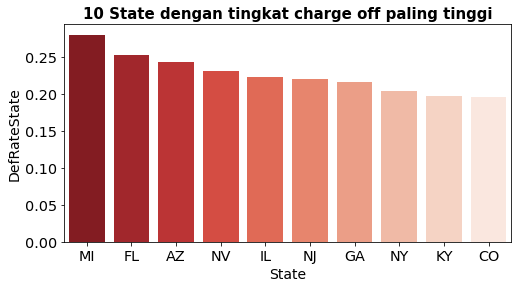

In [ ]:
# 10 State dengan tingkat charge off paling tinggi (Total State=51)
sns.barplot(x='State', y='DefRateState', data=stg_sort.head(10), palette="Reds_r")
plt.title('10 State dengan tingkat charge off paling tinggi', fontsize=15, fontweight='bold')
plt.xlabel('State', fontsize=14)
plt.ylabel('DefRateState', fontsize=14)

Text(0, 0.5, 'State')

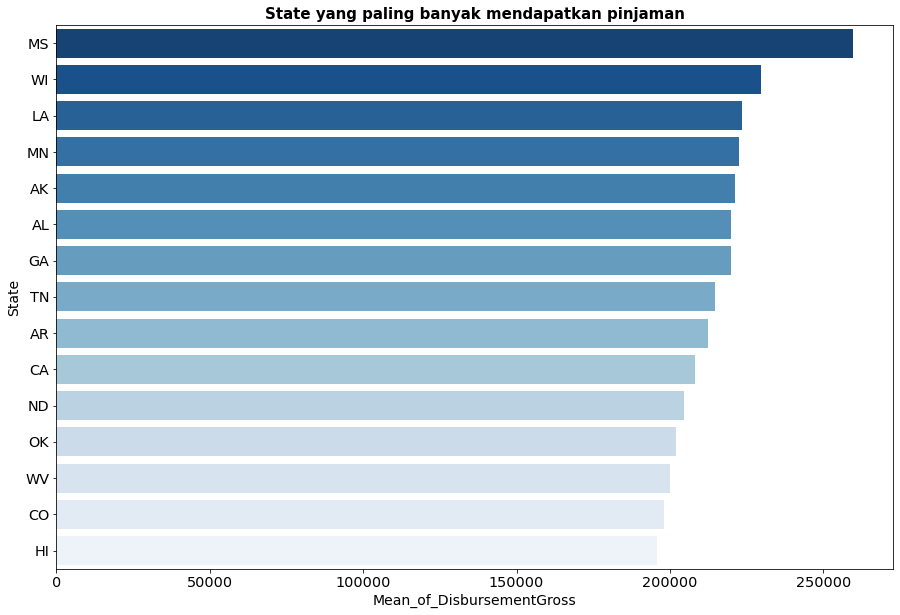

In [ ]:
# Melihat State yang paling banyak mendapatkan pinjaman
plt.figure(figsize=(15,10))
dfg = df.groupby('State').DisbursementGross.mean().reset_index(name='mean_of_DisbursementGross').sort_values(by='mean_of_DisbursementGross',ascending=False)
sns.barplot(y='State', x='mean_of_DisbursementGross', palette="Blues_r", data=dfg.head(15))
plt.title('State yang paling banyak mendapatkan pinjaman', fontsize=15, fontweight='bold')
plt.xlabel('Mean_of_DisbursementGross', fontsize=14)
plt.ylabel('State', fontsize=14)

GA merupakan state ke-6 dengan charge off rate paling tinggi namun GA juga merupakan state ke-11 yang mendapatkan dana pinjaman paling banyak.

###### **e. Industry**

In [ ]:
# Membuat kolom baru Industri dengan mengambil dua digit pertama pada kode NAICS 
df['Industry'] = df['NAICS'].apply(lambda x: x[:2])

# Melakukan mapping Industri berdasarkan dua digit pertama kode NAICS
df['Industry'] = df['Industry'].map({
    '11': 'Ag/For/Fish/Hunt',
    '21': 'Min/Quar/Oil_Gas_ext',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale_trade',
    '44': 'Retail_trade',
    '45': 'Retail_trade',
    '48': 'Trans/Ware',
    '49': 'Trans/Ware',
    '51': 'Information',
    '52': 'Finance/Insurance',
    '53': 'RE/Rental/Lease',
    '54': 'Prof/Science/Tech',
    '55': 'Mgmt_comp',
    '56': 'Admin_sup/Waste_Mgmt_Rem',
    '61': 'Educational',
    '62': 'Healthcare/Social_assist',
    '71': 'Arts/Entertain/Rec',
    '72': 'Accom/Food_serv',
    '81': 'Other_no_pub',
    '92': 'Public_Admin'
    })

Text(0, 0.5, 'Industry')

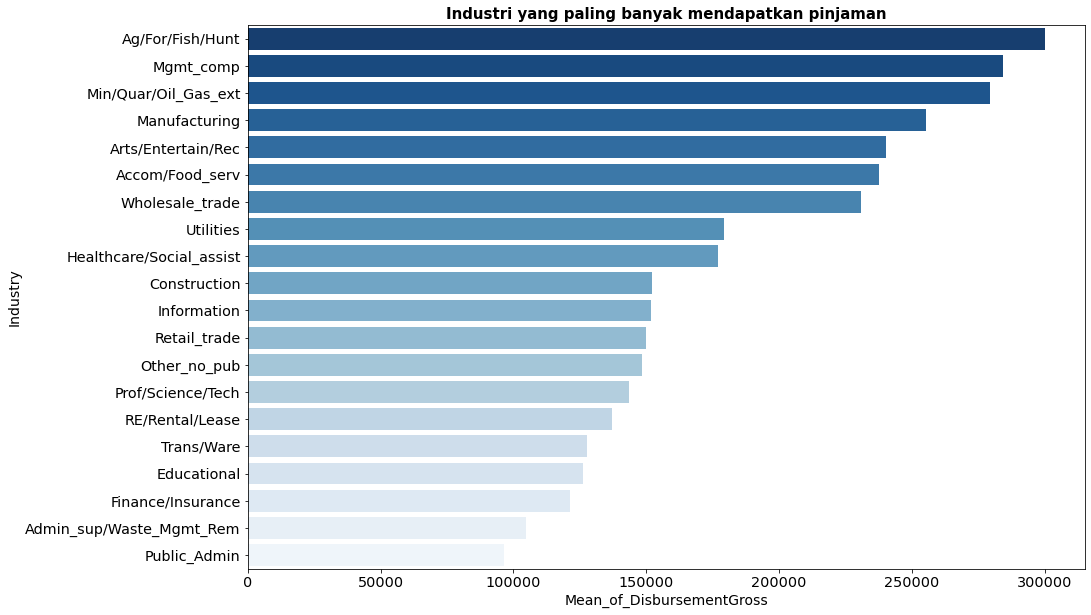

In [ ]:
# Melihat Industri yang paling banyak mendapatkan pinjaman
plt.figure(figsize=(15,10))
dfg = df.groupby('Industry').DisbursementGross.mean().reset_index(name='mean_of_DisbursementGross').sort_values(by='mean_of_DisbursementGross',ascending=False)
sns.barplot(y='Industry', x='mean_of_DisbursementGross', palette='Blues_r', data=dfg)
plt.title('Industri yang paling banyak mendapatkan pinjaman', fontsize=15, fontweight='bold')
plt.xlabel('Mean_of_DisbursementGross', fontsize=14)
plt.ylabel('Industry', fontsize=14)

Industri yang mendapatkan rata-rata jumlah pinjaman paling banyak dari bank adalah Ag/For/Fish/Hunt sementara yang paling rendah adalah Public_Admin.

###### **f. DefRateIndustry**

Membuat Feature DefRateIndustry yang menunjukkan nilai gagal bayar pada masing-masing industri.

In [ ]:
idg = df.groupby(['Industry','MIS_Status']).MIS_Status.count().reset_index(name='TotalMIS_Status')
idg['DefRateIndustry'] = idg['TotalMIS_Status']/idg.groupby('Industry')['TotalMIS_Status'].transform('sum')
idg = idg[idg['MIS_Status']=='CHGOFF']
idg = idg[['Industry','DefRateIndustry']]

In [ ]:
idg_sort = idg.sort_values(by='DefRateIndustry', ascending=False)
idg_sort.head(10)

,Industry,DefRateIndustry
12,Finance/Insurance,0.29
30,RE/Rental/Lease,0.27
34,Trans/Ware,0.26
10,Educational,0.21
0,Accom/Food_serv,0.21
2,Admin_sup/Waste_Mgmt_Rem,0.21
8,Construction,0.20
16,Information,0.20
32,Retail_trade,0.19
20,Mgmt_comp,0.17


In [ ]:
# Memeriksa kesesuaian Industry dan Default Rate-nya
df.merge(idg, on='Industry', how='outer')[['Industry', 'DefRateIndustry']].sample(5)

,Industry,DefRateIndustry
56087,Retail_trade,0.19
306250,Admin_sup/Waste_Mgmt_Rem,0.21
319736,Ag/For/Fish/Hunt,0.09
168891,Manufacturing,0.13
76554,Accom/Food_serv,0.21


In [ ]:
# Menetapkan pada df baru
df = df.merge(idg, on='Industry', how='outer')

Text(0, 0.5, 'DefRateIndustry')

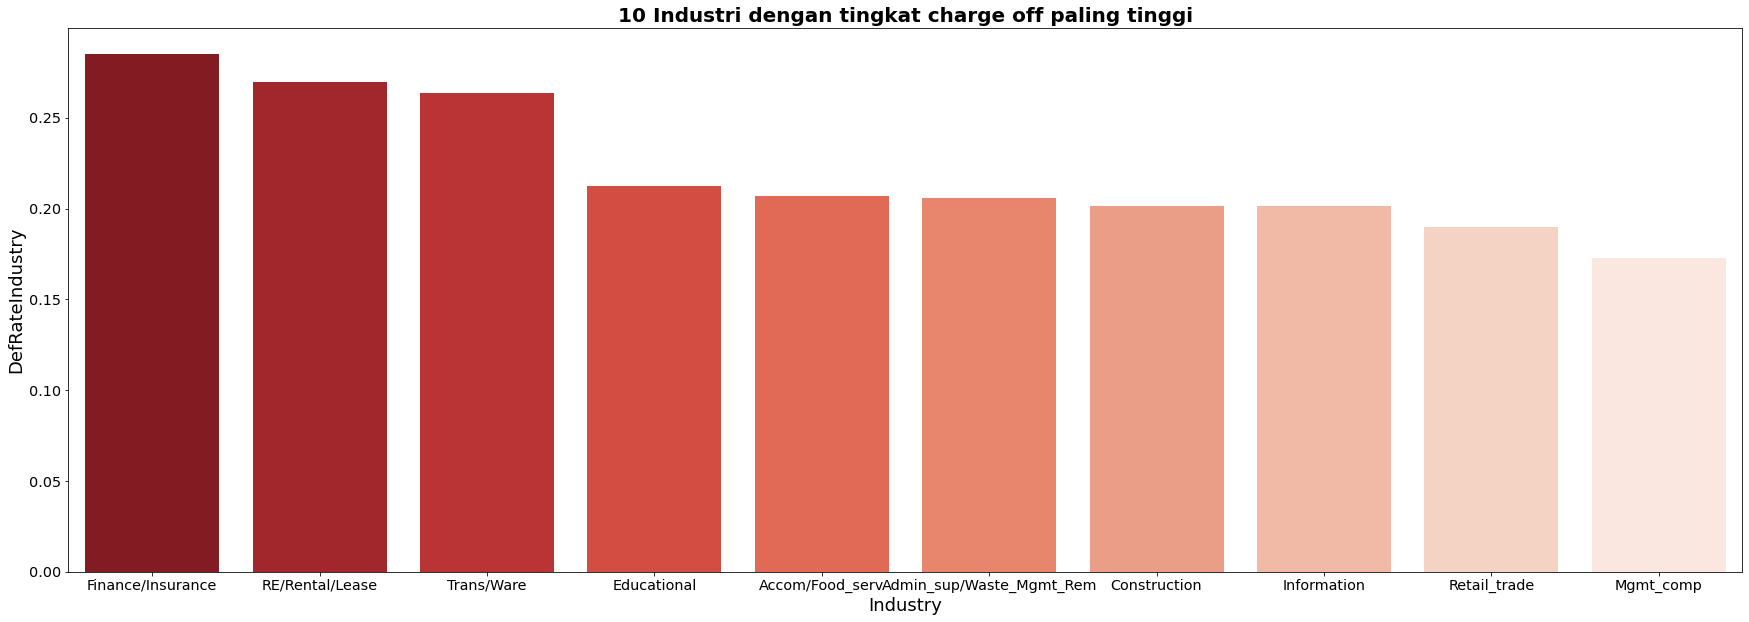

In [ ]:
# 10 Industri dengan tingkat charge off paling tinggi
plt.figure(figsize=(30,10))
sns.barplot(x='Industry', y='DefRateIndustry', data=idg_sort.head(10), palette="Reds_r")
plt.title('10 Industri dengan tingkat charge off paling tinggi', fontsize=20, fontweight='bold')
plt.xlabel('Industry', fontsize=18)
plt.ylabel('DefRateIndustry', fontsize=18)

Finance merupakan industry dengan tingkat charge off paling tinggi hal ini juga sesuai dengan data yang menyebutkan finance merupakan industri ketiga yang mendapatkan dana pinjaman paling rendah.

###### **g. IsFranchise**

In [ ]:
# Membuat feature yg menunjukkan apakah bisnis merupakan franchise atau bukan
# Jika franchise maka 1, jika tidak maka 0
df['IsFranchise'] = df['FranchiseCode'].apply(lambda x: 1 if x >1 else 0)

#### **4.2.2. Feature Selection**

Membuang feature yang kurang relevan atau redundant

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323270 entries, 0 to 323269
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNr_ChkDgt      323270 non-null  int64         
 1   Name               323266 non-null  object        
 2   City               323270 non-null  object        
 3   State              323270 non-null  object        
 4   Zip                323270 non-null  int64         
 5   Bank               323270 non-null  object        
 6   BankState          323270 non-null  object        
 7   NAICS              323270 non-null  object        
 8   ApprovalDate       323270 non-null  datetime64[ns]
 9   ApprovalFY         323270 non-null  int64         
 10  Term               323270 non-null  int64         
 11  NoEmp              323270 non-null  int64         
 12  NewExist           323270 non-null  int64         
 13  CreateJob          323270 non-null  int64   

In [ ]:
# Menyimpan data awal
df1 = df.copy()

In [ ]:
df.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv',
       'IsDefault', 'IsRetainedJob', 'RealEstate', 'SBA_AppvPct', 'StateSame',
       'DefRateState', 'Industry', 'DefRateIndustry', 'IsFranchise'],
      dtype='object')

**Alasan drop feature:**
1. 'LoanNr_ChkDgt': merupakan primary key
2. 'Name' : memiliki kardinalitas yang sangat tinggi dan hanya memuat informasi nama bisnis sehingga tidak dapat dijadikan prediktor target.
3. 'City', 'Zip' : memiliki kardinalitas yang sangat tinggi dan telah diwakilkan oleh state.
4. 'State' : memiliki kardinalitas yang tinggi dan telah digantikan oleh defratestate dan statesame.
5. 'Bank' : memiliki kardinalitas yang sangat tinggi dan hanya memuat informasi nama bank sehingga tidak dapat dijadikan prediktor target.
6. 'BankState' : memiliki kardinalitas yang tinggi dan telah digantikan oleh statesame.
7. 'NAICS' : digantikan oleh industry.
8. 'ApprovalDate' dan 'ApprovalFY' merujuk pada waktu pinjaman ketika disetujui sehingga tidak dapat menjadi preditor target.
9. 'CreateJob': berkolerasi kuat dengan RetainedJob sehingga perlu dipilih salah satu.
10. 'RetainedJob': digantikan oleh IsRetainedJob
11. 'FranchiseCode: memiliki kardinalitas yang tinggi dan telah digantikan oleh IsFranchise
12. 'LowDoc' : merupakan klasifikasi dari besar pinjaman, kami memilih untuk menggunakan besar pinjamannya langsung.
13. 'ChgOffDate': 75% data pada feature berisi null value, feature ini menunjukkan tanggal ketika peminjaman dinyatan gagal. kami hanya berfokus kepada status pinjaman.
14. 'DisbursementDate': feature waktu sudah tidak diperlukan.
15. 'BalanceGross' dan  'ChgOffPrinGr' : 75% data memiliki nilai 0.. Selain itu ChgOffPrinGr merupakan feature yang berisi jumlah yang dibebankan apabila pinjaman charge off, hal ini tidak dapat dijadikan penentu target.
16. 'MIS_Status': digantikan IsDefault
17. 'GrAppv' dan 'SBA_Appv': digantikan SBAApvPct
18. 'Industry': digantikan DefRateIndustry
19. 'NoEmp': tidak dapat memisahkan target dengan baik, selain itu telah diperiksa melalui heatmap korelasi terhadap targetnya sangat lemah.


In [ ]:
df = df.drop(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
              'NAICS', 'ApprovalDate', 'ApprovalFY','CreateJob','RetainedJob','FranchiseCode','LowDoc',
              'ChgOffDate', 'DisbursementDate','BalanceGross','MIS_Status', 'ChgOffPrinGr',
              'GrAppv','SBA_Appv','Industry','NoEmp'],axis=1)

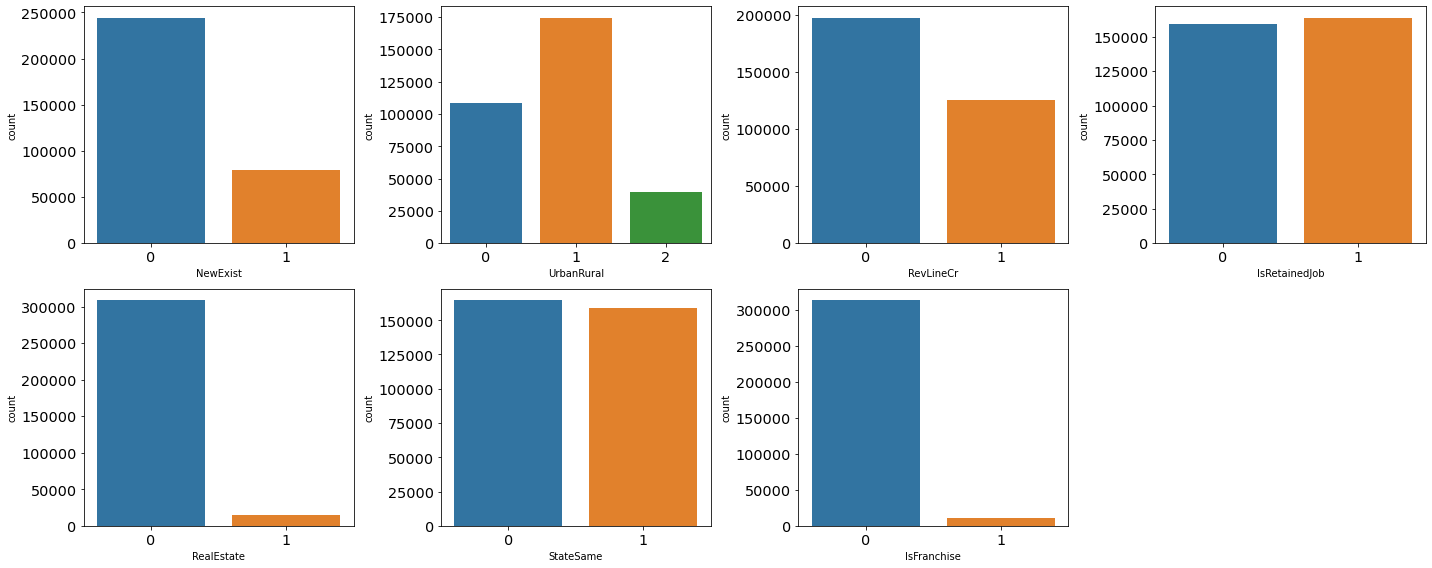

In [ ]:
plt.figure(figsize=(20,8))
features = ['NewExist','UrbanRural','RevLineCr','IsRetainedJob','RealEstate','StateSame','IsFranchise']

for i in range(0,len(features)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=df[features[i]])
    plt.tight_layout()

**ObservationResult**: Ternyata feature RealEstate dan IsFranchise sangat timpang, kedua feature ini tidak dapat dijadikan feature yang baik untuk memprediksi target sehingga akan didrop saja.

In [ ]:
df = df.drop(['IsFranchise','RealEstate'],axis=1)

Text(0.5, 1.0, 'Correlation Heatmap Between Numerical Variables')

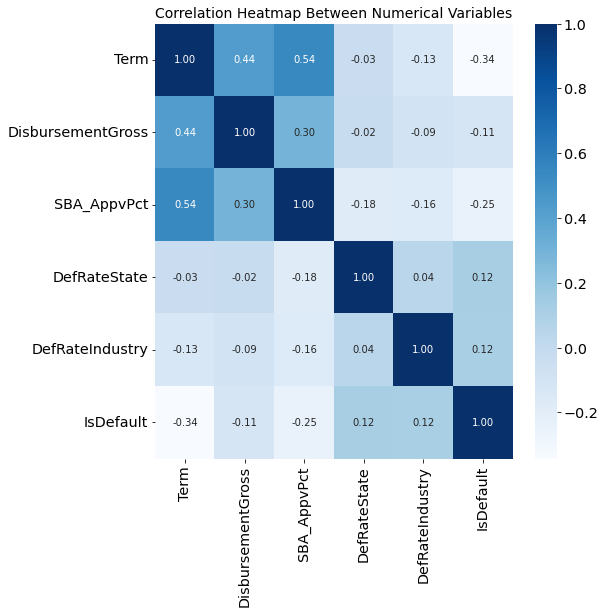

In [ ]:
# Memeriksa hubungan data numerik dengan target
features = ['Term','DisbursementGross', 'SBA_AppvPct', 'DefRateState', 'DefRateIndustry','IsDefault']
plt.figure(figsize=(8,8))
sns.heatmap(df[features].corr(), cmap='Blues', annot=True, fmt='.2f')
plt.title('Correlation Heatmap Between Numerical Variables', fontsize=14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323270 entries, 0 to 323269
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Term               323270 non-null  int64  
 1   NewExist           323270 non-null  int64  
 2   UrbanRural         323270 non-null  int64  
 3   RevLineCr          323270 non-null  int64  
 4   DisbursementGross  323270 non-null  float64
 5   IsDefault          323270 non-null  int64  
 6   IsRetainedJob      323270 non-null  int64  
 7   SBA_AppvPct        323270 non-null  float64
 8   StateSame          323270 non-null  int64  
 9   DefRateState       323270 non-null  float64
 10  DefRateIndustry    323270 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 37.7 MB


### **4.3. Handle Outliers**

Melakukan handling outliers pada feature DisbursementGross.

#### **a. Term**

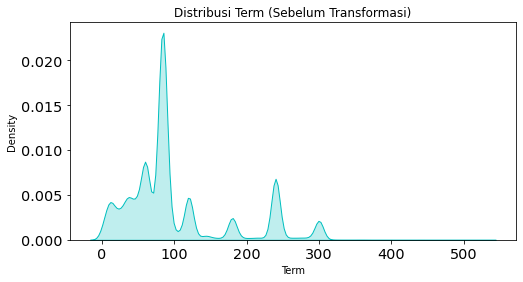

In [ ]:
# Distribusi Term (sebelum transformation)
sns.kdeplot(df['Term'], color='c', shade=True)
plt.title('Distribusi Term (Sebelum Transformasi)');

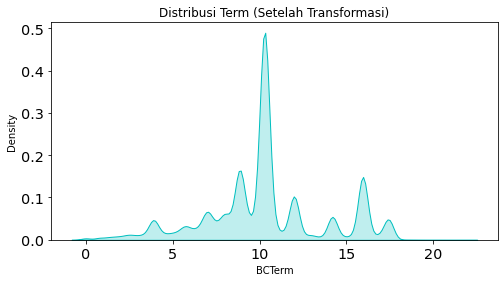

In [ ]:
# Distribusi Term (setelah Box-Cox transformation)
df['BCTerm'] = st.boxcox(df['Term'])[0]
sns.kdeplot(df['BCTerm'], color='c',shade=True)
plt.title('Distribusi Term (Setelah Transformasi)');
# Lebih mendekati distribusi normal

In [ ]:
# Melihat nilai skewness sebelum dan setelah transformasi
# Dikatakan skew apabila nilainya >0.75
print('Nilai skewness sebelum transformasi:', df['Term'].skew())
print('Nilai skewness setelah transformasi:', df['BCTerm'].skew())

Nilai skewness sebelum transformasi: 1.2327077504190855
Nilai skewness setelah transformasi: 0.022179852506536354


**Actual Outlier Handling Using Z-score method**

In [ ]:
print(f"Jumlah baris BCTerm sebelum memfilter outlier: {len(df['BCTerm'])}")

zscore = abs(st.zscore(df['BCTerm'])) # hitung absolute z-scorenya
filtered_entries = zscore < 3 # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, hanya ambil yang z-scorenya dibawah 3

print(f"Jumlah baris BCTerm setelah memfilter outlier: {len(df['BCTerm'])}")

Jumlah baris BCTerm sebelum memfilter outlier: 323270
Jumlah baris BCTerm setelah memfilter outlier: 323269


#### **b. DisbursementGross**

**Box-Cox Transform**

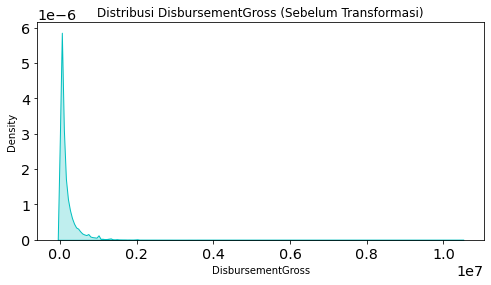

In [ ]:
# Distribusi DisbursementGross (sebelum transformation)
sns.kdeplot(df['DisbursementGross'], color='c', shade=True)
plt.title('Distribusi DisbursementGross (Sebelum Transformasi)');

In [ ]:
# Membandingkan metode log transformation dan Box-Cox tranformation berdasarkan nilai skewness-nya
print('Nilai skewness ketika menggunakan log tranformation:', (np.log(df['DisbursementGross'])).skew())
print('Nilai skewness ketika menggunakan Box-Cox tranformation:', pd.Series(st.boxcox(df['DisbursementGross'])[0]).skew())

# Karena metode Box-Cox nilai skewnessnya lebih kecil maka kami akan menggunakan metode ini

Nilai skewness ketika menggunakan log tranformation: 0.03387648118530538
Nilai skewness ketika menggunakan Box-Cox tranformation: 0.0021649885851420226


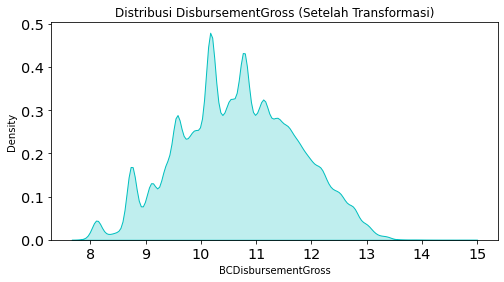

In [ ]:
# Distribusi DisbursementGross (setelah Box-Cox transformation)
df['BCDisbursementGross'] = st.boxcox(df['DisbursementGross'])[0]
sns.kdeplot(df['BCDisbursementGross'], color='c',shade=True)
plt.title('Distribusi DisbursementGross (Setelah Transformasi)');
# Lebih mendekati distribusi normal

In [ ]:
# Melihat nilai skewness sebelum dan setelah transformasi
# Dikatakan skew apabila nilainya >0.75
print('Nilai skewness sebelum transformasi:', df['DisbursementGross'].skew())
print('Nilai skewness setelah transformasi:', df['BCDisbursementGross'].skew())

Nilai skewness sebelum transformasi: 3.6831064188700364
Nilai skewness setelah transformasi: 0.0021649885851420226


**Actual Outlier Handling Using Z-score method**

In [ ]:
print(f"Jumlah baris BCDisbursementGross sebelum memfilter outlier: {len(df['BCDisbursementGross'])}")

zscore = abs(st.zscore(df['BCDisbursementGross'])) # hitung absolute z-scorenya
filtered_entries = zscore < 3 # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, hanya ambil yang z-scorenya dibawah 3

print(f"Jumlah baris BCDisbursementGross setelah memfilter outlier: {len(df['BCDisbursementGross'])}")

Jumlah baris BCDisbursementGross sebelum memfilter outlier: 323269
Jumlah baris BCDisbursementGross setelah memfilter outlier: 323237


In [ ]:
# Drop Term dan DisbursementGross karena telah digantikan oleh BCTerm dan BCDisbursementGross
df = df.drop(['Term','DisbursementGross'],axis=1)

In [ ]:
df.describe()

,NewExist,UrbanRural,RevLineCr,IsDefault,IsRetainedJob,SBA_AppvPct,StateSame,DefRateState,DefRateIndustry,BCTerm,BCDisbursementGross
count,323237.00,323237.00,323237.00,323237.00,323237.00,323237.00,323237.00,323237.00,323237.00,323237.00,323237.00
mean,0.24,0.79,0.39,0.17,0.51,0.67,0.49,0.17,0.17,10.34,10.67
std,0.43,0.64,0.49,0.38,0.50,0.18,0.50,0.05,0.04,3.46,1.05
min,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.04,0.07,0.00,7.91
25%,0.00,0.00,0.00,0.00,0.00,0.50,0.00,0.14,0.15,8.86,9.95
50%,0.00,1.00,0.00,0.00,1.00,0.70,0.00,0.17,0.17,10.29,10.69
75%,0.00,1.00,1.00,0.00,1.00,0.85,1.00,0.20,0.20,11.99,11.42
max,1.00,2.00,1.00,1.00,1.00,1.00,1.00,0.28,0.29,20.41,13.82


### **4.4. Standardization**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323237 entries, 0 to 323269
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   NewExist             323237 non-null  int64  
 1   UrbanRural           323237 non-null  int64  
 2   RevLineCr            323237 non-null  int64  
 3   IsDefault            323237 non-null  int64  
 4   IsRetainedJob        323237 non-null  int64  
 5   SBA_AppvPct          323237 non-null  float64
 6   StateSame            323237 non-null  int64  
 7   DefRateState         323237 non-null  float64
 8   DefRateIndustry      323237 non-null  float64
 9   BCTerm               323237 non-null  float64
 10  BCDisbursementGross  323237 non-null  float64
dtypes: float64(5), int64(6)
memory usage: 29.6 MB


In [ ]:
# Memisahkan features dan target
X = df.drop(columns=['IsDefault']) # menggunakan semua feature kecuali target
Y = df['IsDefault']

In [ ]:
# Melakukan pemisahan data train dan data test
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2, random_state=42, stratify=Y) 

In [ ]:
# Melakukan Standardisasi
from sklearn.preprocessing import StandardScaler
feats = ['BCTerm','SBA_AppvPct','DefRateState','DefRateIndustry','BCDisbursementGross']

ss = StandardScaler()
for col in feats:
  scaler = ss.fit(Xtrain[[col]]) # membuat objek yang difit terhadap data training
  Xtrain[col] = scaler.transform(Xtrain[[col]]) # menggunakan objek scaler untuk mentransformasi data pada data train
  Xtest[col] = scaler.transform(Xtest[[col]]) # menggunakan objek scaler untuk mentransformasi data pada data test

In [ ]:
Xtrain.describe()

,NewExist,UrbanRural,RevLineCr,IsRetainedJob,SBA_AppvPct,StateSame,DefRateState,DefRateIndustry,BCTerm,BCDisbursementGross
count,258589.00,258589.00,258589.00,258589.00,258589.00,258589.00,258589.00,258589.00,258589.00,258589.00
mean,0.24,0.79,0.39,0.51,0.00,0.49,-0.00,-0.00,0.00,-0.00
std,0.43,0.64,0.49,0.50,1.00,0.50,1.00,1.00,1.00,1.00
min,0.00,0.00,0.00,0.00,-3.44,0.00,-2.94,-2.31,-2.98,-2.62
25%,0.00,0.00,0.00,0.00,-0.95,0.00,-0.65,-0.52,-0.42,-0.68
50%,0.00,1.00,0.00,1.00,0.15,0.00,-0.12,-0.11,-0.01,0.01
75%,0.00,1.00,1.00,1.00,0.98,1.00,0.71,0.69,0.48,0.71
max,1.00,2.00,1.00,1.00,1.81,1.00,2.38,2.60,2.91,2.99


### **4.5. Class Imbalance**

Melakukan oversampling pada data train, pemilihan oversampling dibandingkan undersampling dilakukan agar kami tidak kehilangan banyak rows untuk melatih model.

In [ ]:
from imblearn.over_sampling import SMOTE
Xtrain_over, Ytrain_over = SMOTE(0.5, random_state=42).fit_resample(Xtrain, Ytrain)

In [ ]:
print('Original')
print(pd.Series(Y).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(Ytrain_over).value_counts())

Original
0    267906
1     55331
Name: IsDefault, dtype: int64


SMOTE
0    214324
1    107162
Name: IsDefault, dtype: int64


## **CHAPTER V. MODELING**

Kami memiliki class yang imbalance, meskipun telah dilakukan oversampling akan lebih baik menggunakan evaluasi model untuk class imbalance (AUC/F-1), dalam kasus ini kami menganggap kedua feature sama pentingnya, kami ingin menekan tingkat charge off namun kami juga tidak ingin salah memprediksi sehingga kehilangan terlalu banyak nasabah, karena dua hal ini sama penting maka kami akan fokus kepada nilai AUC untuk mengevaluasi model.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model, Xtrain, Ytrain, Xtest, Ytest):
    Ypred = model.predict(Xtest)
    Ypred_train = model.predict(Xtrain)
    Ypred_proba = model.predict_proba(Xtest)
    Ypred_proba_train = model.predict_proba(Xtrain)

    print('Accuracy (Test Set): %.2f'% accuracy_score(Ytest,Ypred))
    print('Precision (Test Set): %.2f'% precision_score(Ytest,Ypred))
    print('Recall (Test Set): %.2f'% recall_score(Ytest,Ypred))
    print('F1-Score (Test Set): %.2f'% f1_score(Ytest,Ypred))
    
    print('AUC (Test Proba): %.2f'% roc_auc_score(Ytest, Ypred_proba[:,1]))
    print('AUC (Train Proba): %.2f'% roc_auc_score(Ytrain, Ypred_proba_train[:,1]))

### **5.1. Decision Tree**
- Data lebih banyak categorical, decision tree
cenderung lebih baik performanya;
- Data tidak balance, decision tree dan improvement-nya
cenderung lebih baik.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(Xtrain_over,Ytrain_over)

eval_classification(dt, Xtrain_over, Ytrain_over, Xtest, Ytest)

Accuracy (Test Set): 0.93
Precision (Test Set): 0.77
Recall (Test Set): 0.80
F1-Score (Test Set): 0.79
AUC (Test Proba): 0.88
AUC (Train Proba): 1.00


**overfit.**

In [ ]:
# Melakukan Tuning Hyperparameter
from sklearn.model_selection import RandomizedSearchCV

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )
# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, random_state=42, cv=5, scoring='roc_auc')
model.fit(Xtrain_over,Ytrain_over)

# Predict & Evaluation
Ypred = model.predict(Xtest) 
eval_classification(model, Xtrain_over, Ytrain_over,  Xtest, Ytest)

Accuracy (Test Set): 0.93
Precision (Test Set): 0.77
Recall (Test Set): 0.84
F1-Score (Test Set): 0.80
AUC (Test Proba): 0.96
AUC (Train Proba): 0.98


In [ ]:
print('Best max_depth:', model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model.best_estimator_.get_params()['max_features'])

Best max_depth: 83
Best min_samples_split: 100
Best min_samples_leaf: 10
Best max_features: sqrt


In [ ]:
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [ ]:
pipeline = make_pipeline(StandardScaler(),
                         SMOTE(0.5, random_state=42),
                         DecisionTreeClassifier(random_state=42, max_depth=83, min_samples_split=100, min_samples_leaf=10, max_features='sqrt'))
# evaluate the model using cross-validation
scores = cross_val_score(pipeline, X, Y, scoring='roc_auc', cv=10)
print('AUC: %.3f (%.3f)' % (np.mean(scores)*100, np.std(scores)*100))

AUC: 92.763 (6.640)


### **5.2. Random Forest**

In [ ]:
# Terapkan algoritma random forest ke dataset
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(Xtrain_over, Ytrain_over)

eval_classification(rf, Xtrain_over, Ytrain_over, Xtest, Ytest)

Accuracy (Test Set): 0.95
Precision (Test Set): 0.85
Recall (Test Set): 0.83
F1-Score (Test Set): 0.84
AUC (Test Proba): 0.97
AUC (Train Proba): 1.00


**Model tidak overfit dan nilai AUCnya lebih baik daripada Decision Tree**

In [ ]:
pipeline = make_pipeline(StandardScaler(),
                         SMOTE(0.5, random_state=42),
                         RandomForestClassifier(random_state=42))
# evaluate the model using cross-validation
scores = cross_val_score(pipeline, X, Y, scoring='roc_auc', cv=10)
print('AUC: %.3f (%.3f)' % (np.mean(scores)*100, np.std(scores)*100))

AUC: 96.248 (0.972)


### **5.3. Adaboost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(random_state=42)
abc.fit(Xtrain_over, Ytrain_over)
eval_classification(abc, Xtrain_over, Ytrain_over,  Xtest, Ytest)

Accuracy (Test Set): 0.91
Precision (Test Set): 0.70
Recall (Test Set): 0.84
F1-Score (Test Set): 0.77
AUC (Test Proba): 0.95
AUC (Train Proba): 0.96


**Niali AUC pada test tidak lebih baik dari random forest namun gapnya lebih kecil**

In [ ]:
pipeline = make_pipeline(StandardScaler(),
                         SMOTE(0.5, random_state=42),
                         AdaBoostClassifier(random_state=42))
# evaluate the model using cross-validation
scores = cross_val_score(pipeline, X, Y, scoring='roc_auc', cv=10)
print('AUC: %.3f (%.3f)' % (np.mean(scores)*100, np.std(scores)*100))

AUC: 95.312 (0.775)


### **5.4. XGBoost**

In [ ]:
from xgboost import XGBClassifier

xg = XGBClassifier(random_state=42)
xg.fit(Xtrain_over, Ytrain_over)
eval_classification(xg, Xtrain_over, Ytrain_over,  Xtest, Ytest)

Accuracy (Test Set): 0.93
Precision (Test Set): 0.79
Recall (Test Set): 0.83
F1-Score (Test Set): 0.81
AUC (Test Proba): 0.97
AUC (Train Proba): 0.98


**Dilihat dari nilai AUC-nya model XGBoost merupakan yang paling baik dengan gap antara AUC train dan test yang sangat kecil sehingga kami memutuskan model yang paling baik untuk memprediksi target adalah XGBoost.**

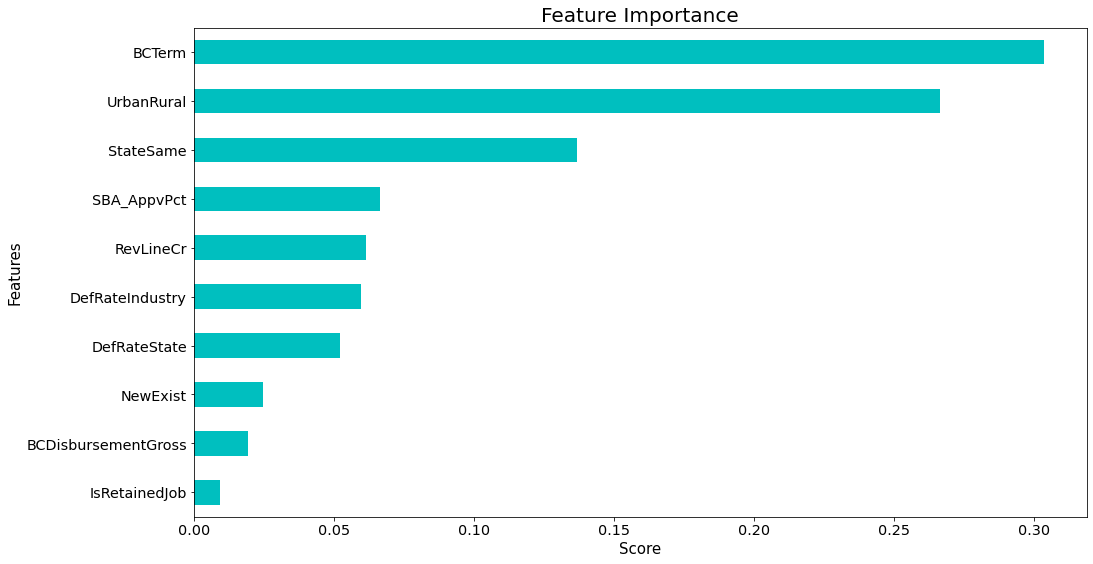

In [ ]:
# Melihat fetaure importance pada model XGboost
feat_importances = pd.Series(xg.feature_importances_, index=X.columns)
f, ax = plt.subplots(figsize=(16,9))
feat_importances.nlargest(14).plot(kind='barh', color ='c')
ax.invert_yaxis()
plt.title('Feature Importance', fontsize=20)
plt.ylabel('Features', fontsize=15)
plt.xlabel('Score', fontsize=15)
plt.show()

In [ ]:
pipeline = make_pipeline(StandardScaler(),
                         SMOTE(0.5, random_state=42),
                         XGBClassifier(random_state=42))
# evaluate the model using cross-validation
scores = cross_val_score(pipeline, X, Y, scoring='roc_auc', cv=10)
print('AUC: %.3f (%.3f)' % (np.mean(scores)*100, np.std(scores)*100))

AUC: 96.429 (0.648)


In [ ]:
# Melihat confusion matrix
from sklearn.metrics import confusion_matrix

Ytrue = Ytest
Ypred = pd.Series(xg.predict(Xtest))

cm_xg = confusion_matrix(Ytrue, Ypred)
cm_xg

#Confusion matrix ini dari data test yang berisi 20% data (64648 rows)

array([[51101,  2481],
       [ 1851,  9215]])

In [ ]:
#Sumbu y: Actual label
#Sumbu x: Prediksi label

TN = cm_xg[0][0]
FP = cm_xg[1][0]
FN = cm_xg[0][1]
TP = cm_xg[1][1]

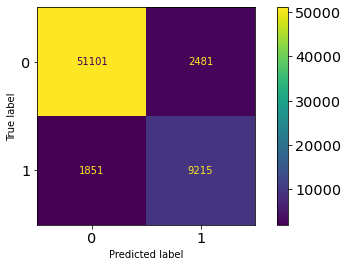

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xg, Xtest, Ytest);

In [ ]:
Ytest.value_counts()

0    53582
1    11066
Name: IsDefault, dtype: int64

In [ ]:
Pif+Chgoff

64648

In [ ]:
ApprvModel

53582

In [ ]:
ApprvModel = TN + FN
Chgoff = 11066
ChgoffModel =  FN
Pif = 53582
wrong_reject_loan = FP
print(f'persentase charge off sebelum model {round(Chgoff/(Chgoff+Pif)*100,2)}%')
print(f'persentase charge off setelah model {round(ChgoffModel/ApprvModel*100,2)}%')
print(f'prediksi model menyebabkan bank kehilangan nasabah sebanyak {round(wrong_reject_loan/Pif*100,2)}%')

persentase charge off sebelum model 17.12%
persentase charge off setelah model 4.63%
prediksi model menyebabkan bank kehilangan nasabah sebanyak 3.45%


## **CHAPTER VI. Insight from The Most Importance Features by Models**

### **6.1. Term**

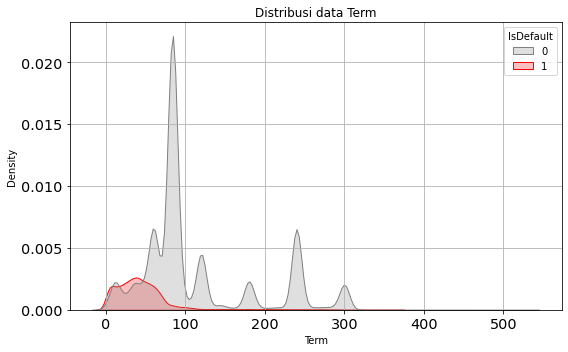

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(x=df1['Term'], hue=df1['IsDefault'], palette=['Grey','Red'],shade=True)
plt.grid()
plt.title('Distribusi data Term')
plt.tight_layout()

Semakin lama waktu pinjaman tingkat charge offnya semakin rendah, hal ini dikarenakan semakin lama jangka waktu pinjaman maka cicilan yang akan dibayarkan setiap bulan akan lebih sedikit sehingga meringankan debitur dalam membayar pinjamannya dan akan mengurangi kemungkinan gagal bayar. Apabila debitur terdeteksi charge off salah satu solusi yang dapat ditawarkan adalah dengan menawarkan jangka waktu pinjamannya menjadi lebih lama agar dapat meringankan debitur, selain itu jangka waktu yang lebih lama juga akan lebih menguntungkan untuk bank karena jumlah revenue dari bunga yang diperoleh akan lebih tinggi.

### **6.2. UrbanRural**

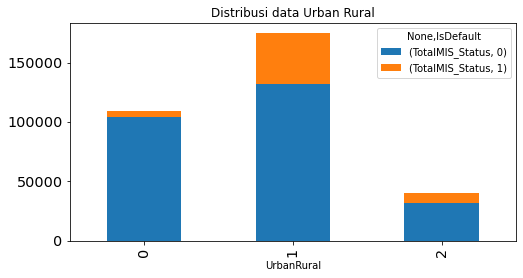

In [ ]:
pct = df1.groupby(['UrbanRural','IsDefault']).IsDefault.count().reset_index(name='TotalMIS_Status')
df_bar = pct.pivot_table(index='UrbanRural', columns='IsDefault')

df_bar.plot(kind = 'bar', stacked=True)
plt.title('Distribusi data Urban Rural');

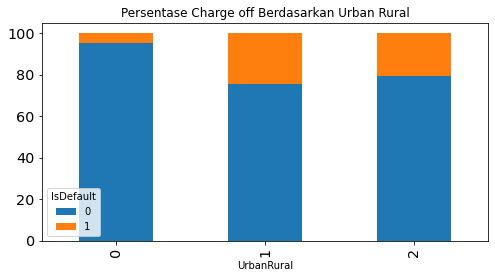

In [ ]:
pct = df1.groupby(['UrbanRural','IsDefault']).IsDefault.count().reset_index(name='TotalMIS_Status')
pct['Percentage'] = 100 * pct['TotalMIS_Status']/pct.groupby('UrbanRural')['TotalMIS_Status'].transform('sum')
df_bar = pct.pivot_table(index='UrbanRural', columns='IsDefault',
                           values='Percentage')

df_bar.plot(kind = 'bar', stacked=True)
plt.title('Persentase Charge off Berdasarkan Urban Rural');

**Reason** : Profesor Sekolah Bisnis Universitas Kansas Bob DeYoung menyebutkan bank  selalu mengandalkan hard and soft information dalam memutuskan kelayakan pinjaman. Tetapi di masyarakat pedesaan, hard information tentang kelayakan pinjaman bisa jadi sulit didapat. Misalnya, usaha kecil pedesaan cenderung tidak memiliki laporan keuangan yang diaudit yang mengurangi jumlah hard information tentang kelayakan pinjaman mereka. Namun, merutnya komunitas pedesaan lebih erat daripada komunitas perkotaan, dan jaringan informasi pribadi ini meluas ke komunitas bisnis pedesaan juga. Ini memberi bank pedesaan sumbangan soft information tentang bisnis dan pengusaha lokal. Bank jelas menggunakan informasi ini dengan baik, karena dibuktikan dengan tingkat default yang rendah pada pinjaman mereka.

**Recommendation** : 
- Fokus bisnis bisa diperluas untuk daerah Desa, dengan alasan dapat menambah creditur dan pemasukan, disamping itu dapat me-reduce cost dikarenakan fokus panawaran bisnis untuk daerah yang potensi CHGOFF nya rendah.
- Untuk darah Kota, dapat dibuat beberapa policy yang lebih ketat dengan tujuan meminimalisir angka CHGOFF dari debitur yang berlokasi di Kota, seperti persyaratan dokumen bisnis yang lebih lengkap.



Source : https://today.ku.edu/2012/11/06/loan-default-rates-lower-rural-communities

### **6.3. StateSame**

<Figure size 576x360 with 0 Axes>

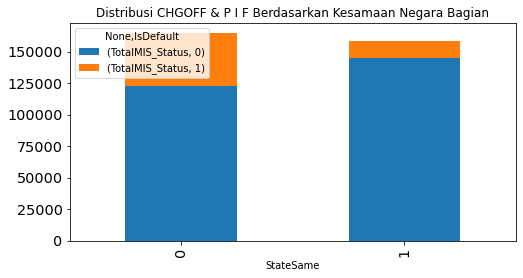

In [ ]:
plt.figure(figsize=(8,5))
pct = df1.groupby(['StateSame','IsDefault']).IsDefault.count().reset_index(name='TotalMIS_Status')
df_bar = pct.pivot_table(index='StateSame', columns='IsDefault')

df_bar.plot(kind = 'bar', stacked=True)
plt.title('Distribusi CHGOFF & P I F Berdasarkan Kesamaan Negara Bagian');

<Figure size 576x360 with 0 Axes>

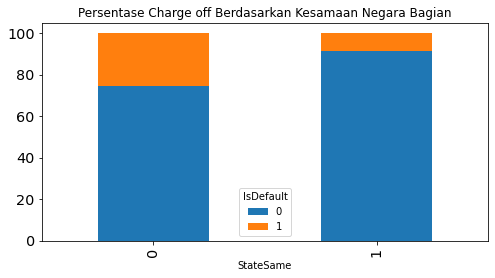

In [ ]:
plt.figure(figsize=(8,5))
pct = df1.groupby(['StateSame','IsDefault']).IsDefault.count().reset_index(name='TotalMIS_Status')
pct['Percentage'] = 100 * pct['TotalMIS_Status']/pct.groupby('StateSame')['TotalMIS_Status'].transform('sum')
df_bar = pct.pivot_table(index='StateSame', columns='IsDefault',
                           values='Percentage')

df_bar.plot(kind = 'bar', stacked=True)
plt.title('Persentase Charge off Berdasarkan Kesamaan Negara Bagian');

**Reason** : Lokasi bank dan debitur yang sama memiliki tingkat charge off yang lebih rendah, melayani pinjaman untuk bisnis di negara bagian lain akan lebih sulit karena proses pemantauan bisnis dan proses mendapatkan informasi-informasi untuk menentukan kelayakannya pun akan menjadi lebih sulit.

**Recommendation**
- Bank merekomendasikan peminjam untuk mengajukan pinjaman pada cabang bank yang berlokasi sama dengan lokasi peminjam.
- Dalam melakukan marketing campaign, bank dapat berforkus pada calon debitur yang berlokasi sama dengan bank dalam melakukan promosinya, sehingga mereduce cost untuk pemasaran.

### **6.4. SBA Approved Percentage**

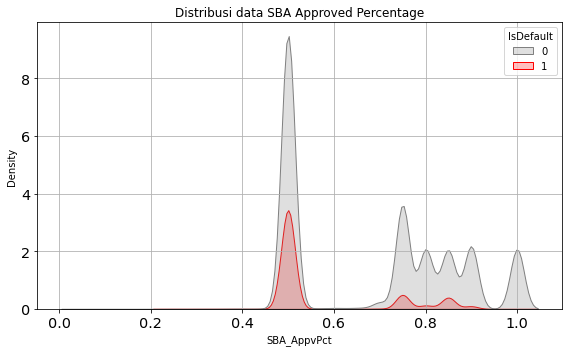

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(x=df1['SBA_AppvPct'], hue=df1['IsDefault'], palette=['Grey','Red'],shade=True)
plt.grid()
plt.title('Distribusi data SBA Approved Percentage')
plt.tight_layout()

Sebagian pinjaman yang masuk merupakan pinjaman yang mendapatkan jaminan 50% dari SBA yang termasuk ke dalam program SBA Express. Pada program ini keputusan kelayakan dibuat oleh pemberi pinjaman (Bank) bukan SBA sehingga pinjaman ini tidak memerlukan dokumen-dokumen yang disyaratkan SBA dan pinjaman akan diproses dalam waktu yang cukup singkat yaitu 36 jam. Pinjaman yang masuk kategori ini juga memiliki tingkat charge off yang tinggi. Asumsi kami adalah bahwa sebagian besar bisnis memilih untuk menggunakan program SBA Express karena lebih mudah untuk mendapatkan persetujuan pinjaman dalam waktu yang lebih singkat, sayangnya dalam proses persetujuan ini penilaian kelayakan yang dilakukan bank dalam waktu yang singkat terhadap bisnis kurang baik sehingga banyaknya pinjaman yang gagal bayar, dalam kasus ini penggunaan machine learning model akan sangat membantu dalam memprediksi kelayakan bisnis untuk mendapatkan pinjaman atau tidak.

Source : [SBA Express](https://www.sba.gov/partners/lenders/7a-loan-program/types-7a-loans)